In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pprint
import matplotlib.ticker as mtick
import scipy.stats as stats
import pandas as pd
%pylab inline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# The following section uses no evidence in inference for the initial starting products

# Plot Confidence intervals for product LTVs

In [28]:
clients_over_time_per_week_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_all_clients")
cumulative_clients_over_time_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management")
rev_customer_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking")
rev_customer_checking_no_evidence  = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma ")
rev_customer_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep")
rev_customer_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx")
rev_customer_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit ")
rev_customer_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_money_market_bonus")
rev_customer_mmb_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_no_evidence =  pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_total_weekly_rev")



# Plot the total number of clients over time

In [29]:
cumulative_clients_week_0_no_evidence = defaultdict(list)
cumulative_clients_week_1_no_evidence = defaultdict(list)
cumulative_clients_week_2_no_evidence = defaultdict(list)
cumulative_clients_week_0_final = []
cumulative_clients_week_1_final = []
cumulative_clients_week_2_final = []
[cumulative_clients_week_0_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[0]]
[cumulative_clients_week_1_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[1]]
[cumulative_clients_week_2_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[2]]
for k,v in cumulative_clients_week_0_no_evidence.items():
    cumulative_clients_week_0_final.append(max(v))
for k,v in cumulative_clients_week_1_no_evidence.items():
    cumulative_clients_week_1_final.append(max(v))  
for k,v in cumulative_clients_week_2_no_evidence.items():
    cumulative_clients_week_2_final.append(max(v)) 
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [30]:
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [31]:
final_cumulative_clients_no_evidence[2][-1]

1093

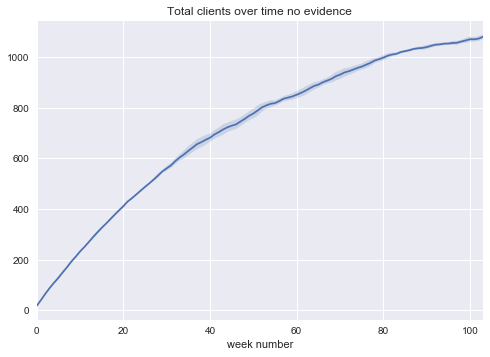

In [32]:
sns.tsplot(final_cumulative_clients_no_evidence)
plt.title('Total clients over time no evidence')
plt.xlabel('week number')

# Plot the confidence intervals of the percent of people per product over time 
## No evidence about products given

In [33]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_no_evidence_final = []
cumulative_checking_customers_percent_no_evidence_final = []
cumulative_cmma_customers_percent_no_evidence_final = []
cumulative_es_customers_percent_no_evidence_final = []
cumulative_fx_customers_percent_no_evidence_final = []
cumulative_loc_customers_percent_no_evidence_final = []
cumulative_mmb_customers_percent_no_evidence_final = []

In [34]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_no_evidence,final_cumulative_clients_no_evidence) :
    cumulative_cm_customers_percent_no_evidence_final.append([i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [35]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_checking_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [36]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_cmma_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [37]:
for simulation_es,simulation_total in zip(cumulative_es_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_es_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [38]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_fx_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [39]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_loc_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [40]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_mmb_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

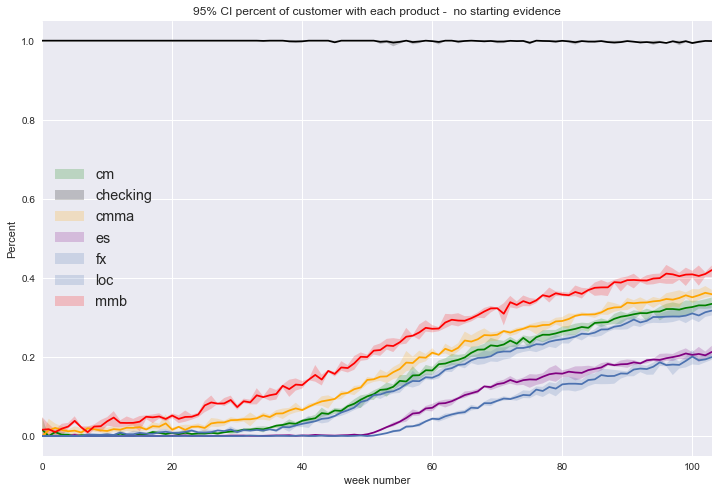

In [70]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_no_evidence_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_no_evidence_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_no_evidence_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','loc','mmb'],fontsize = 'large')
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with each product -  no starting evidence')

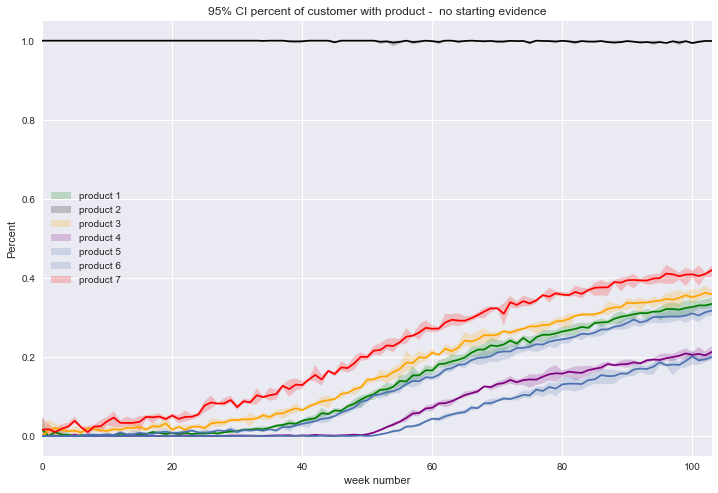

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'product 1',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_no_evidence_final, value = 'product 2',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_no_evidence_final,value='product 3',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_no_evidence_final,value='product 4',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_no_evidence_final,value='product 5',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_no_evidence_final,value='product 6',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_no_evidence_final,value='product 7',ci=95, color ='red')

#checking.legend(['checking'])
plt.legend(['product 1','product 2','product 3','product 4','product 5','product 6','product 7'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  no starting evidence')

# Plot Revenue per product per client (time adjusted) over time
## No starting evidence

In [71]:
cumulative_cm_rev_per_customer_no_evidence_final = []
cumulative_checking_rev_per_customer_no_evidence_final = []
cumulative_cmma_rev_per_customer_no_evidence_final = []
cumulative_es_rev_per_customer_no_evidence_final = []
cumulative_fx_rev_per_customer_no_evidence_final = []
cumulative_loc_rev_per_customer_no_evidence_final = []
cumulative_mmb_rev_per_customer_no_evidence_final = []

In [72]:
for simulation in rev_customer_cm_no_evidence:
    cumulative_cm_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [73]:
for simulation in rev_customer_checking_no_evidence:
    cumulative_checking_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [74]:
for simulation in rev_customer_cmma_no_evidence:
    cumulative_cmma_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [75]:
for simulation in rev_customer_es_no_evidence:
    cumulative_es_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [76]:
for simulation in rev_customer_fx_no_evidence:
    cumulative_fx_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [77]:
for simulation in rev_customer_loc_no_evidence:
    cumulative_loc_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [78]:
for simulation in rev_customer_mmb_no_evidence:
    cumulative_mmb_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

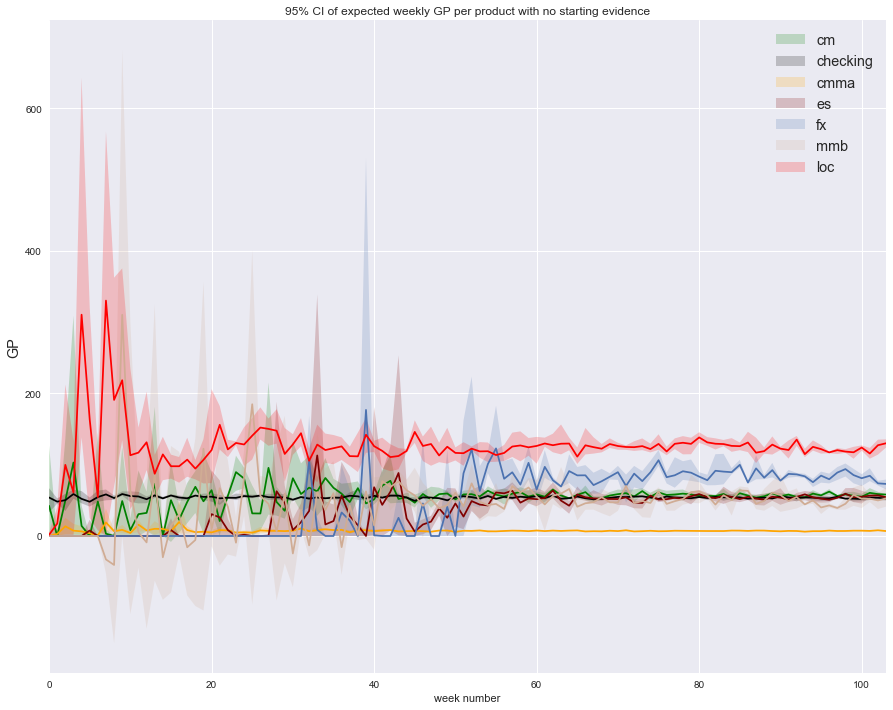

In [69]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_no_evidence_final,value='es',color='maroon',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_no_evidence_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95,color='pink')
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_no_evidence_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb','loc'], fontsize = 'large')
plt.ylabel('GP',fontsize = 'large')
plt.xlabel('week number')
plt.title('95% CI of expected weekly GP per product with no starting evidence')

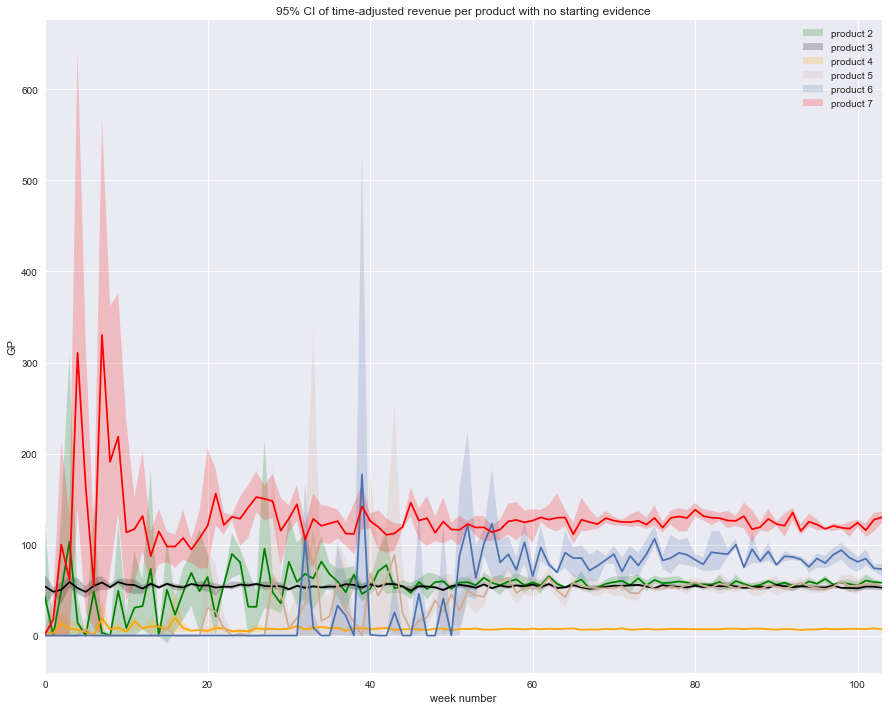

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'product 7',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_no_evidence_final, value = 'product 6',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_no_evidence_final,value='product 5',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_no_evidence_final,value='product 4',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_no_evidence_final,value='product 3',ci=95)
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_no_evidence_final,value='product 2',ci=95, color ='red')


plt.legend(['product 2','product 3','product 4','product 5','product 6','product 7'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of time-adjusted revenue per product with no starting evidence')

In [27]:
print('Mean CM GP for last period = {}'.format(mean([cumulative_cm_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[2][-1]])))

Mean CM GP for last period = 61.04760367698983


In [28]:
print('Mean Checking GP for last period = {}'.format(mean([cumulative_checking_rev_per_customer_no_evidence_final[0][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[1][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[2][-1]])))

Mean Checking GP for last period = 54.24292780560362


In [29]:
print('Mean cmma GP for last period = {}'.format(mean([cumulative_cmma_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[2][-1]])))

Mean cmma GP for last period = 7.4211817836389935


In [30]:
print('Mean es GP for last period = {}'.format(mean([cumulative_es_rev_per_customer_no_evidence_final[0][-1],
        cumulative_es_rev_per_customer_no_evidence_final[1][-1],
        cumulative_es_rev_per_customer_no_evidence_final[2][-1]])))

Mean es GP for last period = 53.97176665760401


In [31]:
print('Mean fx GP for last period = {}'.format(mean([cumulative_fx_rev_per_customer_no_evidence_final[0][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[1][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[2][-1]])))

Mean fx GP for last period = 81.63709381873565


In [32]:
print('Mean loc GP for last period = {}'.format(mean([cumulative_loc_rev_per_customer_no_evidence_final[0][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[1][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[2][-1]])))

Mean loc GP for last period = 6913.272899249615


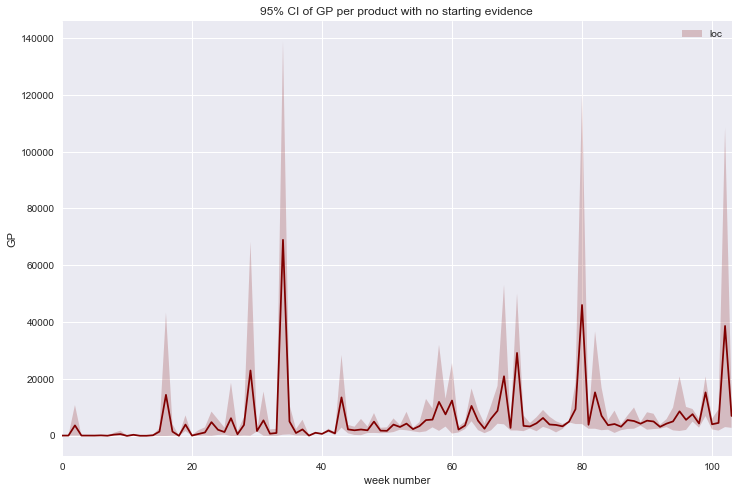

In [33]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95,color='maroon')
plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product with no starting evidence')

# Next, look at the results from each client starting with checking and cm product

In [79]:
clients_over_time_per_week_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking")
rev_customer_checking_evidence_checking_cm  = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx")
rev_customer_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_cm =  pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_total_weekly_rev")



In [80]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_1_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_2_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_cm = []
cumulative_clients_week_1_final_evid_checking_cm = []
cumulative_clients_week_2_final_evid_checking_cm = []
[cumulative_clients_week_0_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[0]]
[cumulative_clients_week_1_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[1]]
[cumulative_clients_week_2_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[2]]
for k,v in cumulative_clients_week_0_evidence_checking_cm.items():
    cumulative_clients_week_0_final_evid_checking_cm.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_cm.items():
    cumulative_clients_week_1_final_evid_checking_cm.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_cm.items():
    cumulative_clients_week_2_final_evid_checking_cm.append(max(v)) 
final_cumulative_clients_evidence_checking_cm = [cumulative_clients_week_0_final_evid_checking_cm
                                        ,cumulative_clients_week_1_final_evid_checking_cm,
                                        cumulative_clients_week_2_final_evid_checking_cm]

In [81]:
final_cumulative_clients_evidence_checking_cm[2][-1]

1056

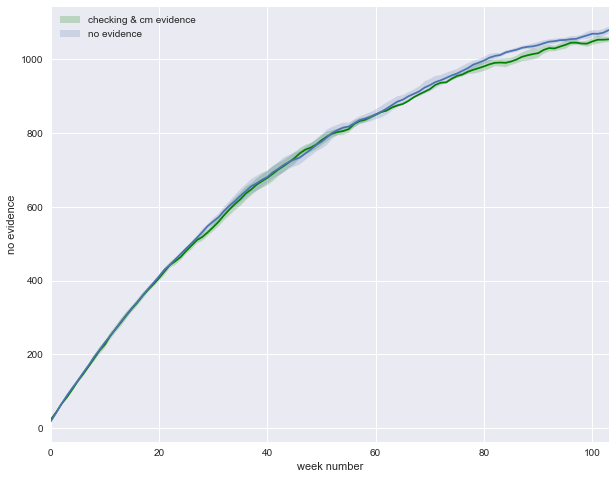

In [88]:
plt.figure(figsize=(10,8))
sns.tsplot(final_cumulative_clients_evidence_checking_cm, value = 'checking & cm evidence', color = 'green')


sns.tsplot(final_cumulative_clients_no_evidence, value = 'no evidence')
plt.legend(['checking & cm evidence' , 'no evidence'])
plt.xlabel('week number')

## Percent of people with each product

In [89]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_cm_final = []
cumulative_checking_customers_percent_evidence_checking_cm_final = []
cumulative_cmma_customers_percent_evidence_checking_cm_final = []
cumulative_es_customers_percent_evidence_checking_cm_final = []
cumulative_fx_customers_percent_evidence_checking_cm_final = []
cumulative_loc_customers_percent_evidence_checking_cm_final = []
cumulative_mmb_customers_percent_evidence_checking_cm_final = []

In [90]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_fx_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [91]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cm_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [92]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_loc_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [93]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_checking_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [94]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cmma_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [95]:
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_es_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [96]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_mmb_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

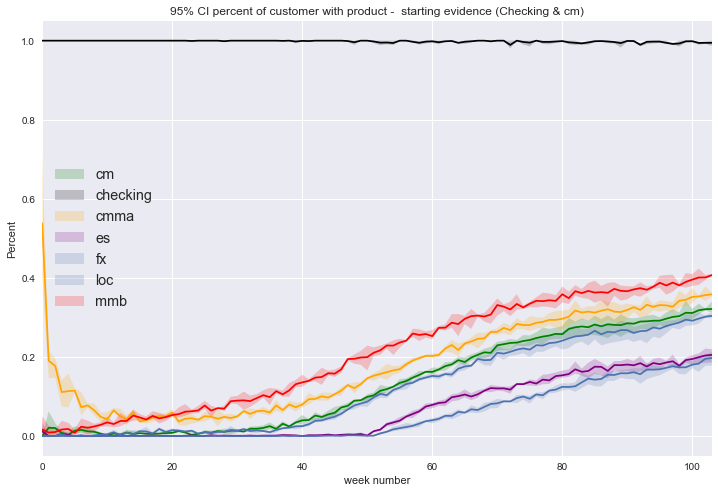

In [98]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_cm_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_cm_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_cm_final,value='mmb',ci=95, color ='red')

plt.legend(['cm','checking','cmma','es','fx','loc','mmb'],fontsize='large')
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & cm)')

## Revenue per product time adjusted

In [99]:
cumulative_cm_rev_per_customer_evidence_checking_cm_final = []
cumulative_checking_rev_per_customer_evidence_checking_cm_final = []
cumulative_cmma_rev_per_customer_evidence_checking_cm_final = []
cumulative_es_rev_per_customer_evidence_checking_cm_final = []
cumulative_fx_rev_per_customer_evidence_checking_cm_final = []
cumulative_loc_rev_per_customer_evidence_checking_cm_final = []
cumulative_mmb_rev_per_customer_evidence_checking_cm_final = []

In [100]:
for simulation in rev_customer_cm_evidence_checking_cm:
    cumulative_cm_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_cm:
    cumulative_checking_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_cm:
    cumulative_cmma_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_cm:
    cumulative_es_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_cm:
    cumulative_fx_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_cm:
    cumulative_loc_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_cm:
    cumulative_mmb_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])

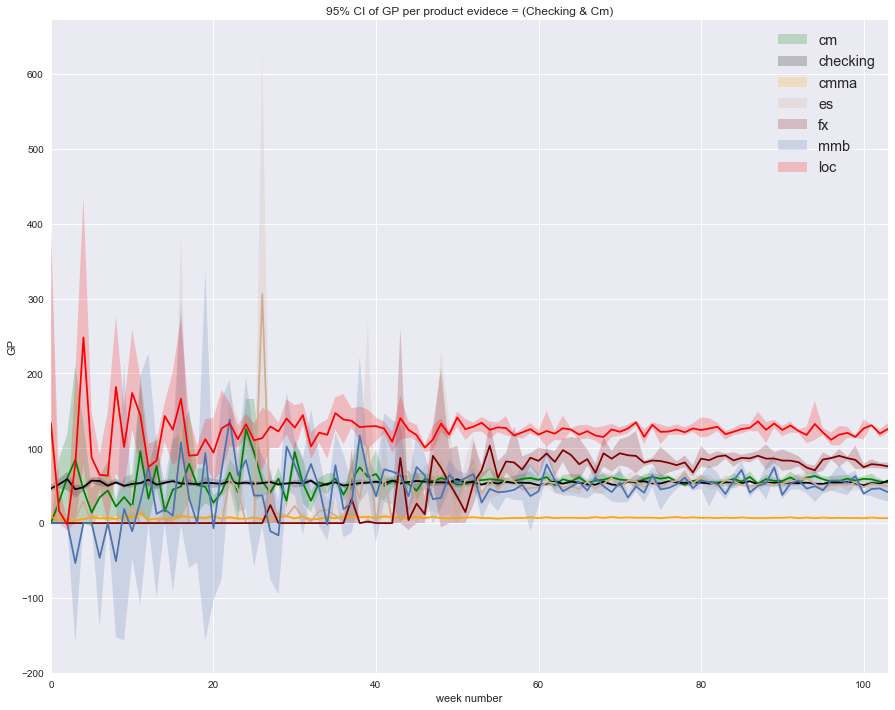

In [106]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_cm_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_cm_final,value='fx',ci=95,color='maroon')
#loc
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_cm_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb','loc'],fontsize='large')
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & Cm)')

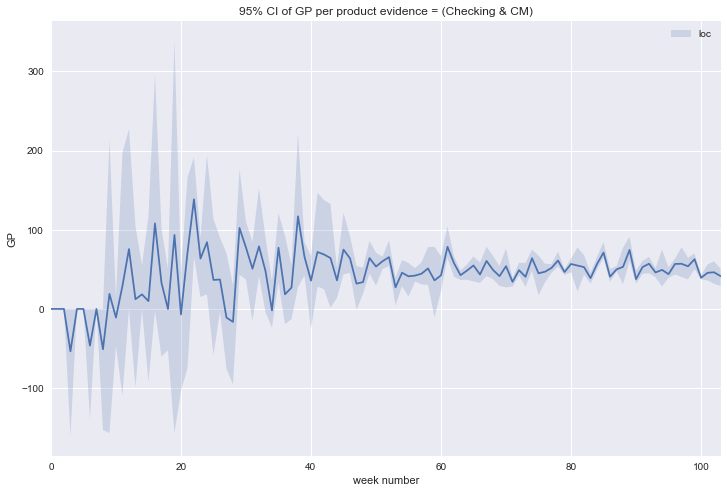

In [107]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & CM)')

In [51]:
print('Mean CM GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cm_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean CM GP for last period (evid = checking , cm) = 60.361483800467376


In [52]:
print('Mean Checking GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_checking_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean Checking GP for last period (evid = checking , cm) = 53.8949778865875


In [53]:
print('Mean cmma GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cmma_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean cmma GP for last period (evid = checking , cm) = 7.170256210942615


In [54]:
print('Mean es GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_es_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean es GP for last period (evid = checking , cm) = 55.01626726415463


In [55]:
print('Mean fx GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_fx_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean fx GP for last period (evid = checking , cm) = 84.56950049172676


In [56]:
print('Mean loc GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_loc_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean loc GP for last period (evid = checking , cm) = 7476.610331652569


# Next, starting evidence of checking & mmb

In [121]:
clients_over_time_per_week_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking")
rev_customer_checking_evidence_checking_mmb  = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx")
rev_customer_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_mmb =  pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_total_weekly_rev")



In [122]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_1_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_2_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_mmb = []
cumulative_clients_week_1_final_evid_checking_mmb = []
cumulative_clients_week_2_final_evid_checking_mmb = []
[cumulative_clients_week_0_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[0]]
[cumulative_clients_week_1_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[1]]
[cumulative_clients_week_2_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[2]]
for k,v in cumulative_clients_week_0_evidence_checking_mmb.items():
    cumulative_clients_week_0_final_evid_checking_mmb.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_mmb.items():
    cumulative_clients_week_1_final_evid_checking_mmb.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_mmb.items():
    cumulative_clients_week_2_final_evid_checking_mmb.append(max(v)) 
final_cumulative_clients_evidence_checking_mmb = [cumulative_clients_week_0_final_evid_checking_mmb
                                        ,cumulative_clients_week_1_final_evid_checking_mmb,
                                        cumulative_clients_week_2_final_evid_checking_mmb]

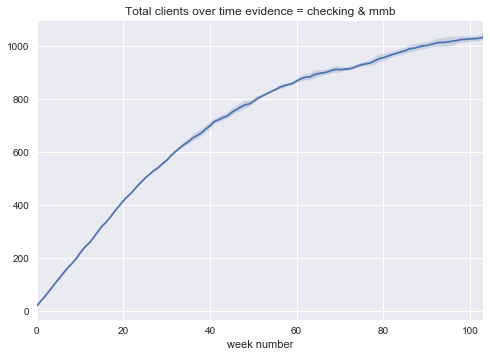

In [123]:
sns.tsplot(final_cumulative_clients_evidence_checking_mmb)
plt.title('Total clients over time evidence = checking & mmb')
plt.xlabel('week number')

## Percent of people with each product given evidence  = checking & mmb

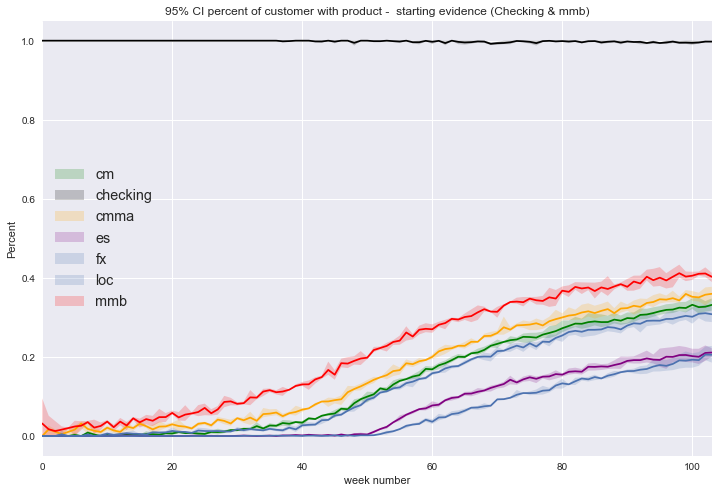

In [124]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_mmb_final = []
cumulative_checking_customers_percent_evidence_checking_mmb_final = []
cumulative_cmma_customers_percent_evidence_checking_mmb_final = []
cumulative_es_customers_percent_evidence_checking_mmb_final = []
cumulative_fx_customers_percent_evidence_checking_mmb_final = []
cumulative_loc_customers_percent_evidence_checking_mmb_final = []
cumulative_mmb_customers_percent_evidence_checking_mmb_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_fx_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cm_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_loc_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_checking_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cmma_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_es_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_mmb_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_mmb_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_mmb_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')

plt.legend(['cm','checking','cmma','es','fx','loc','mmb'],fontsize='large')
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & mmb)')

## Product revenue for evidence = checking & mmb

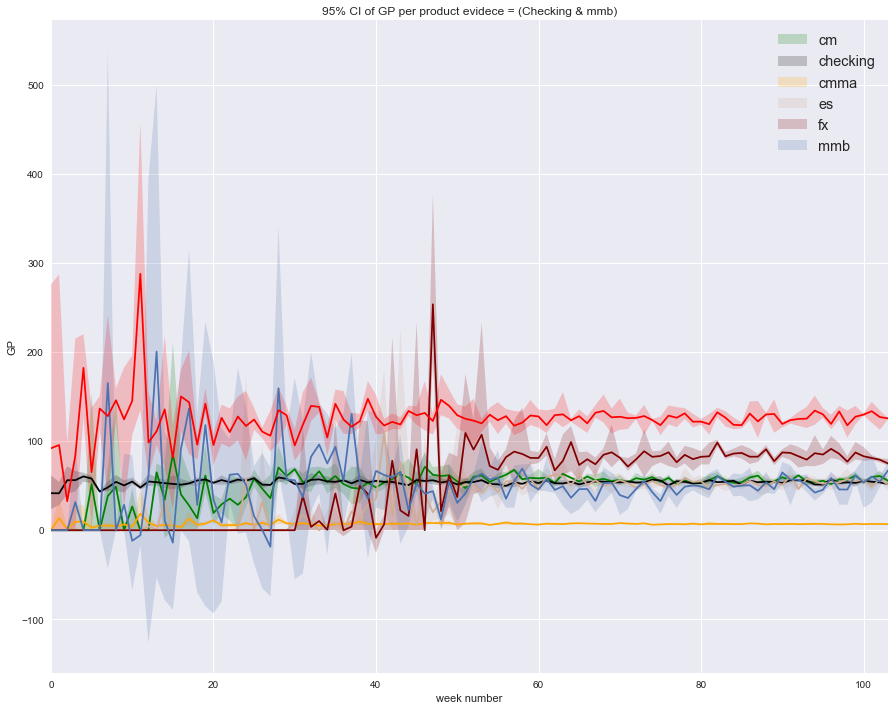

In [125]:
cumulative_cm_rev_per_customer_evidence_checking_mmb_final = []
cumulative_checking_rev_per_customer_evidence_checking_mmb_final = []
cumulative_cmma_rev_per_customer_evidence_checking_mmb_final = []
cumulative_es_rev_per_customer_evidence_checking_mmb_final = []
cumulative_fx_rev_per_customer_evidence_checking_mmb_final = []
cumulative_loc_rev_per_customer_evidence_checking_mmb_final = []
cumulative_mmb_rev_per_customer_evidence_checking_mmb_final = []



for simulation in rev_customer_cm_evidence_checking_mmb:
    cumulative_cm_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_mmb:
    cumulative_checking_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_mmb:
    cumulative_cmma_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_mmb:
    cumulative_es_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_mmb:
    cumulative_fx_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_mmb:
    cumulative_loc_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_mmb:
    cumulative_mmb_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_mmb_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_mmb_final,value='fx',ci=95,color='maroon')
#loc
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'],fontsize='large')
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & mmb)')

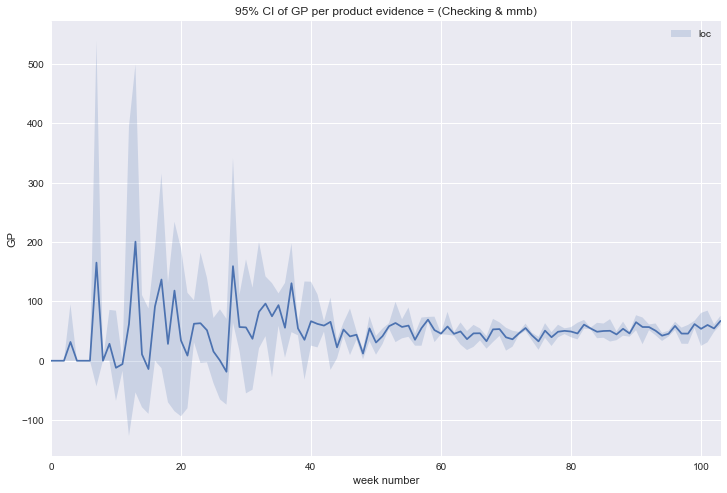

In [126]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & mmb)')

# Finally, starting evidence checking & loc

In [127]:
clients_over_time_per_week_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking")
rev_customer_checking_evidence_checking_loc  = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx")
rev_customer_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_loc =  pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_total_weekly_rev")



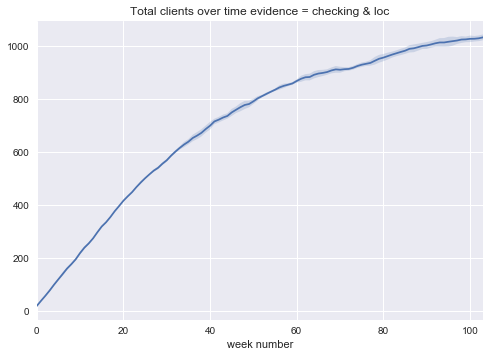

In [128]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_1_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_2_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_loc = []
cumulative_clients_week_1_final_evid_checking_loc = []
cumulative_clients_week_2_final_evid_checking_loc = []
[cumulative_clients_week_0_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[0]]
[cumulative_clients_week_1_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[1]]
[cumulative_clients_week_2_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[2]]
for k,v in cumulative_clients_week_0_evidence_checking_loc.items():
    cumulative_clients_week_0_final_evid_checking_loc.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_loc.items():
    cumulative_clients_week_1_final_evid_checking_loc.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_loc.items():
    cumulative_clients_week_2_final_evid_checking_loc.append(max(v)) 
final_cumulative_clients_evidence_checking_loc = [cumulative_clients_week_0_final_evid_checking_loc
                                        ,cumulative_clients_week_1_final_evid_checking_loc,
                                        cumulative_clients_week_2_final_evid_checking_loc]

#plot it
sns.tsplot(final_cumulative_clients_evidence_checking_loc)
plt.title('Total clients over time evidence = checking & loc')
plt.xlabel('week number')

# Number of clients with each product given evidence = checking and loc

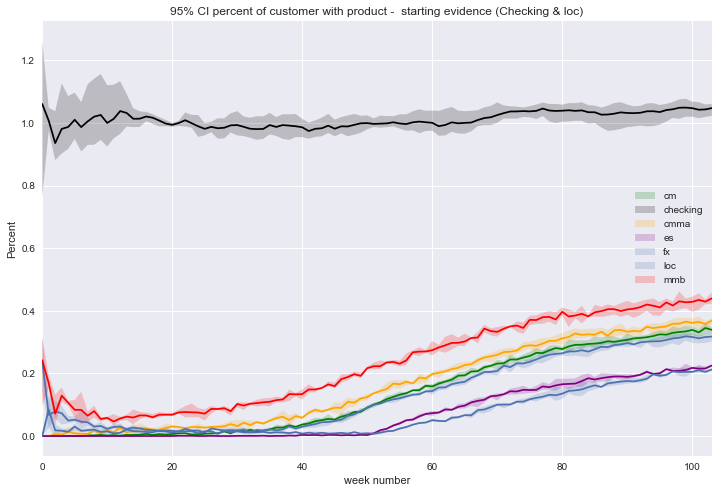

In [129]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_loc_final = []
cumulative_checking_customers_percent_evidence_checking_loc_final = []
cumulative_cmma_customers_percent_evidence_checking_loc_final = []
cumulative_es_customers_percent_evidence_checking_loc_final = []
cumulative_fx_customers_percent_evidence_checking_loc_final = []
cumulative_loc_customers_percent_evidence_checking_loc_final = []
cumulative_mmb_customers_percent_evidence_checking_loc_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_fx_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
    
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cm_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
    
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_loc_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
    
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_checking_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
    
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cmma_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
    
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_es_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
    
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_mmb_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_loc_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_loc_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_loc_final,value='mmb',ci=95, color ='red')

#checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & loc)')

# GP per product per customer given evidence = checking loc

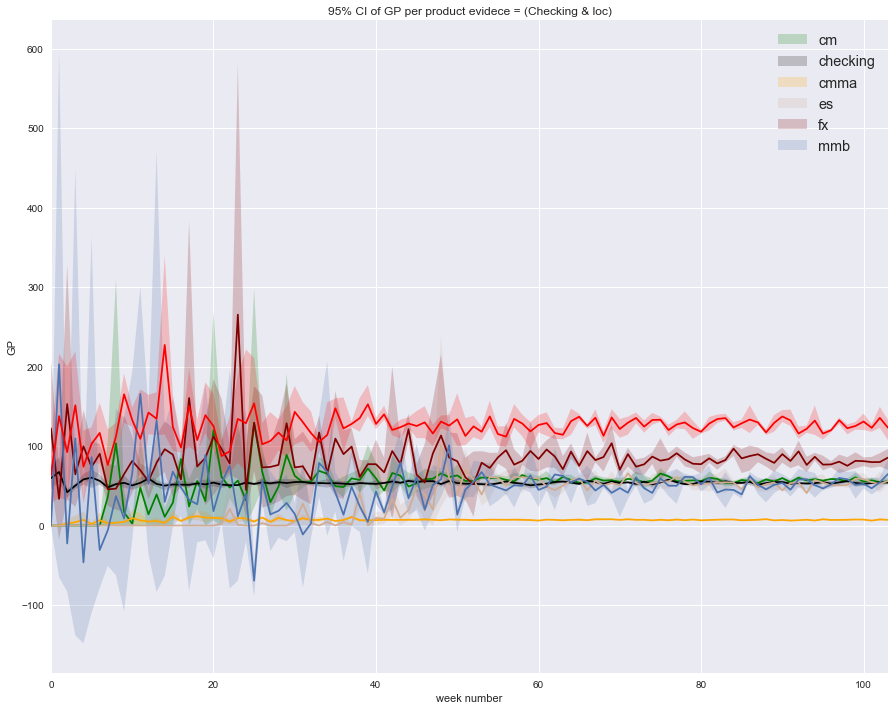

In [130]:
cumulative_cm_rev_per_customer_evidence_checking_loc_final = []
cumulative_checking_rev_per_customer_evidence_checking_loc_final = []
cumulative_cmma_rev_per_customer_evidence_checking_loc_final = []
cumulative_es_rev_per_customer_evidence_checking_loc_final = []
cumulative_fx_rev_per_customer_evidence_checking_loc_final = []
cumulative_loc_rev_per_customer_evidence_checking_loc_final = []
cumulative_mmb_rev_per_customer_evidence_checking_loc_final = []



for simulation in rev_customer_cm_evidence_checking_loc:
    cumulative_cm_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_loc:
    cumulative_checking_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_loc:
    cumulative_cmma_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_loc:
    cumulative_es_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_loc:
    cumulative_fx_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_loc:
    cumulative_loc_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_loc:
    cumulative_mmb_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_loc_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_loc_final,value='fx',ci=95,color='maroon')
#loc
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_loc_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'],fontsize='large')
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & loc)')

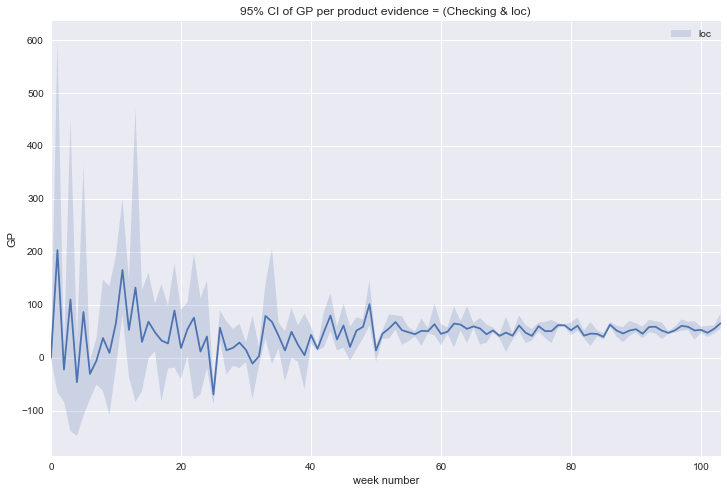

In [131]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & loc)')

# Next, plot each products GP against eachother with the given starting evidence

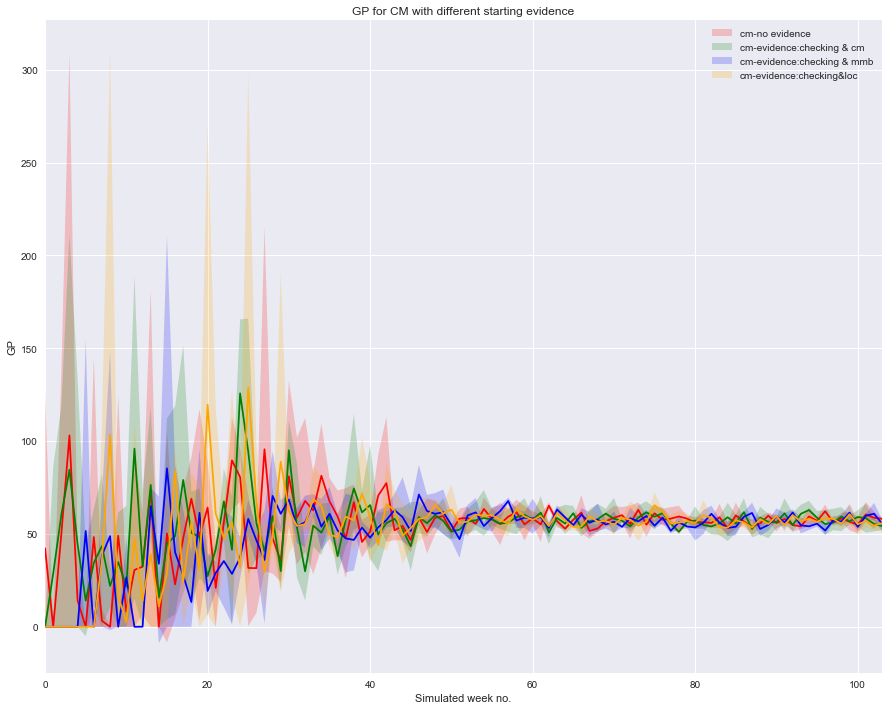

In [132]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'cm-no evidence',color='red', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_cm_final,
           value = 'cm-evidence:checking & cm',color='green', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_mmb_final,
           value = 'cm-evidence:checking & mmb',color='blue', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_loc_final,
           value = 'cm-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cm-no evidence','cm-evidence:checking & cm','cm-evidence:checking & mmb','cm-evidence:checking&loc'])
plt.title('GP for CM with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

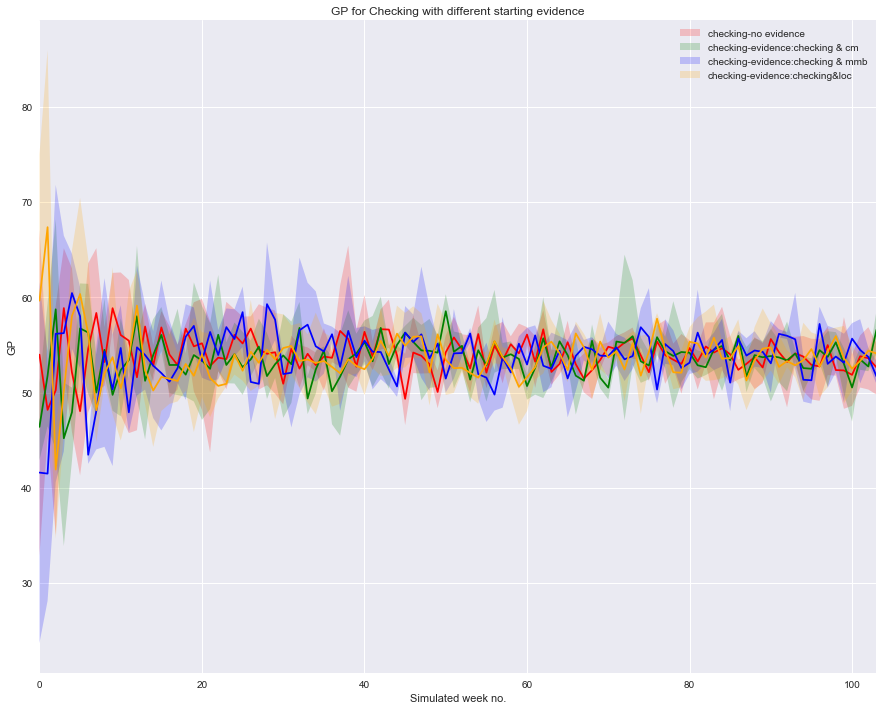

In [133]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_no_evidence_final,value = 'checking-no evidence',color='red', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_cm_final,
           value = 'checking-evidence:checking & cm',color='green', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_mmb_final,
           value = 'checking-evidence:checking & mmb',color='blue', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_loc_final,
           value = 'checking-evidence:checking&loc',color='orange', ci=95)
plt.legend(['checking-no evidence','checking-evidence:checking & cm','checking-evidence:checking & mmb','checking-evidence:checking&loc'])
plt.title('GP for Checking with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

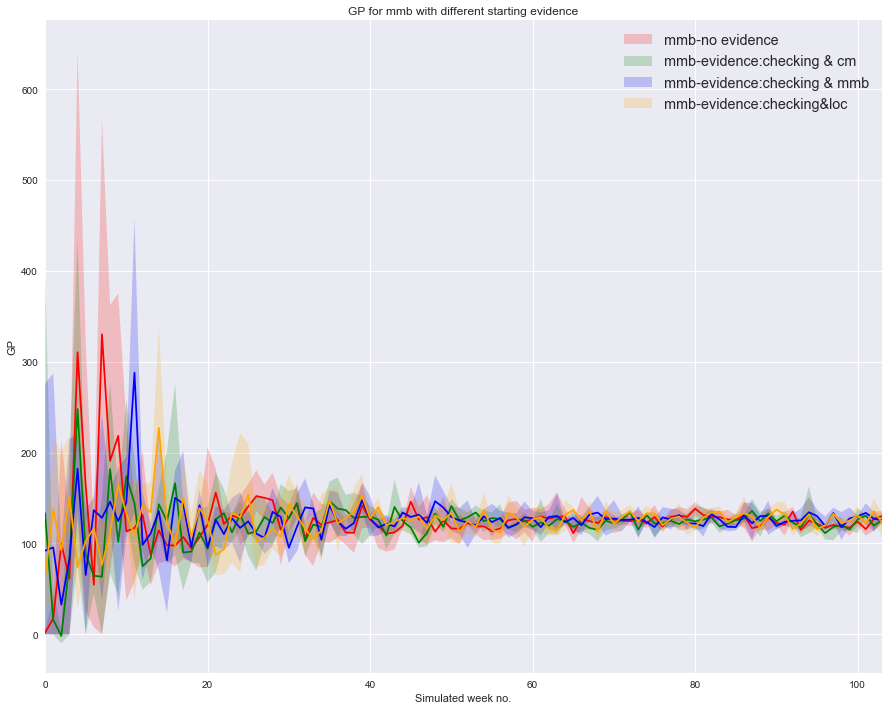

In [136]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_rev_per_customer_no_evidence_final,value = 'mmb-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_cm_final,
           value = 'mmb-evidence:checking & cm',color='green', ci=95)
sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,
           value = 'mmb-evidence:checking & mmb',color='blue', ci=95)

sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_loc_final,
           value = 'mmb-evidence:checking&loc',color='orange', ci=95)
plt.legend(['mmb-no evidence','mmb-evidence:checking & cm','mmb-evidence:checking & mmb','mmb-evidence:checking&loc'],
          fontsize='large')
plt.title('GP for mmb with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

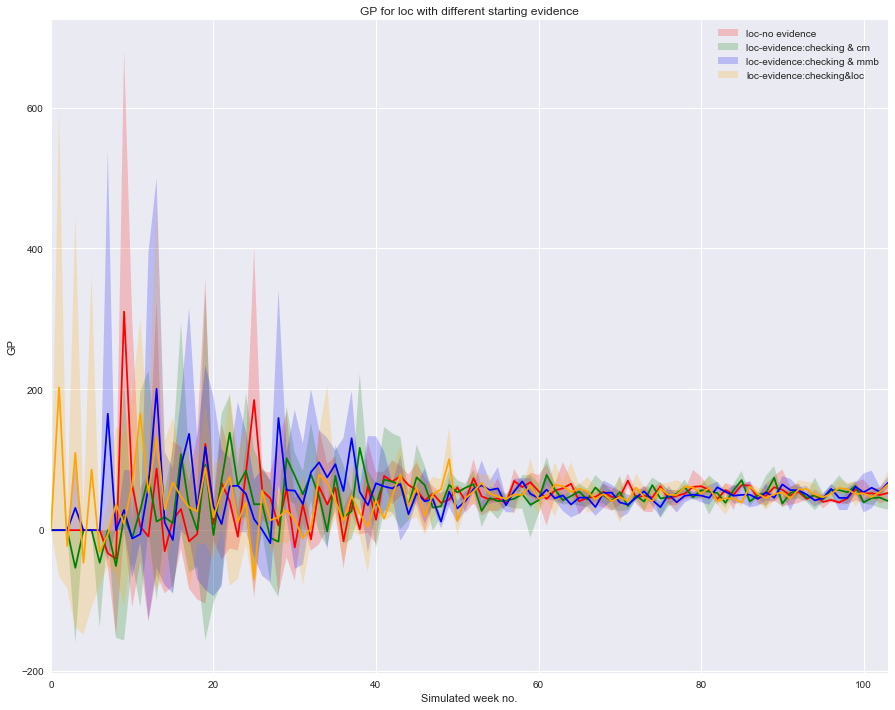

In [135]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_loc_rev_per_customer_no_evidence_final,value = 'loc-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_cm_final,
           value = 'loc-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_mmb_final,
           value = 'loc-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_loc_final,
           value = 'loc-evidence:checking&loc',color='orange', ci=95)
plt.legend(['loc-no evidence','loc-evidence:checking & cm','loc-evidence:checking & mmb','loc-evidence:checking&loc'])
plt.title('GP for loc with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

In [72]:
np.median(cumulative_loc_rev_per_customer_no_evidence_final[0])

2668.9878544153903

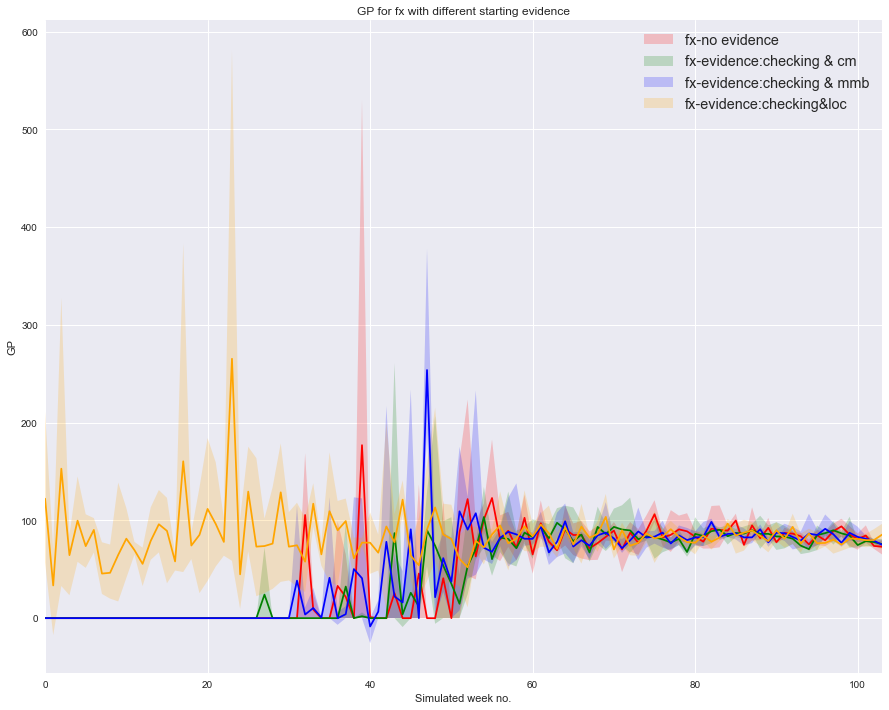

In [137]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_rev_per_customer_no_evidence_final,value = 'fx-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_cm_final,
           value = 'fx-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
           value = 'fx-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_loc_final,
           value = 'fx-evidence:checking&loc',color='orange', ci=95)
plt.legend(['fx-no evidence','fx-evidence:checking & cm','fx-evidence:checking & mmb','fx-evidence:checking&loc'],
          fontsize='large')
plt.title('GP for fx with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

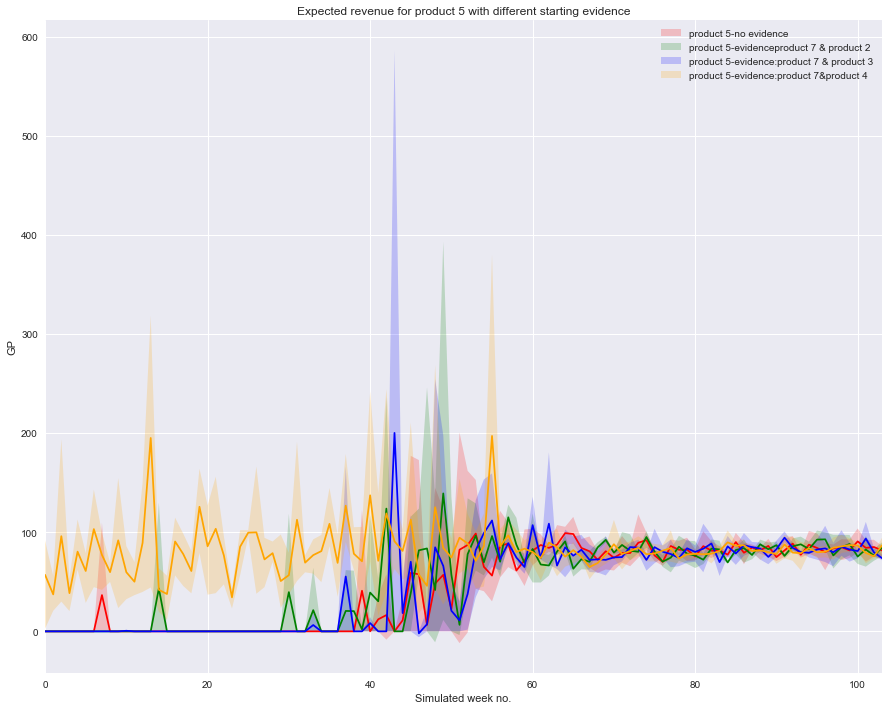

In [74]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_rev_per_customer_no_evidence_final,value = 'product 5-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_cm_final,
           value = 'product 5-evidenceproduct 7 & product 2',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
           value = 'product 5-evidenceproduct 7 & product 3',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_loc_final,
           value = 'product 5-evidence:product 7 &product 4',color='orange', ci=95)
plt.legend(['product 5-no evidence','product 5-evidenceproduct 7 & product 2','product 5-evidence:product 7 & product 3',
            'product 5-evidence:product 7&product 4'])
plt.title('Expected revenue for product 5 with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

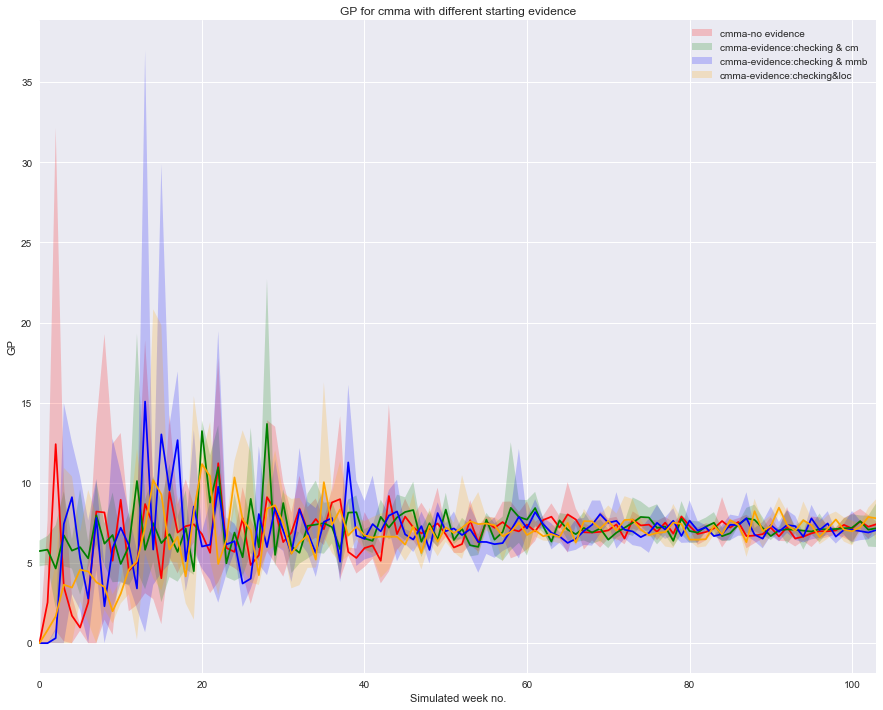

In [75]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cmma_rev_per_customer_no_evidence_final,value = 'cmma-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_cm_final,
           value = 'cmma-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,
           value = 'cmma-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_loc_final,
           value = 'cmma-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cmma-no evidence','cmma-evidence:checking & cm','cmma-evidence:checking & mmb','cmma-evidence:checking&loc'])
plt.title('GP for cmma with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

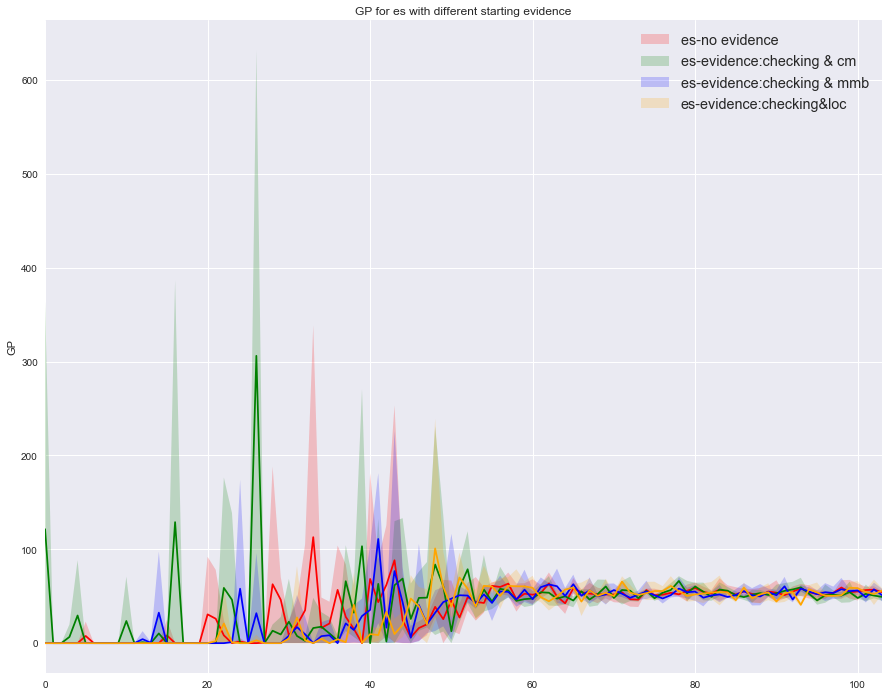

In [141]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_es_rev_per_customer_no_evidence_final,value = 'es-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_cm_final,
           value = 'es-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_mmb_final,
           value = 'es-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_loc_final,
           value = 'es-evidence:checking&loc',color='orange', ci=95)
plt.legend(['es-no evidence','es-evidence:checking & cm','es-evidence:checking & mmb','es-evidence:checking&loc'],
          fontsize='large')
plt.title('GP for es with different starting evidence')
plt.ylabel('GP')

# Next, look at the percent of people with each product for different starting evidence

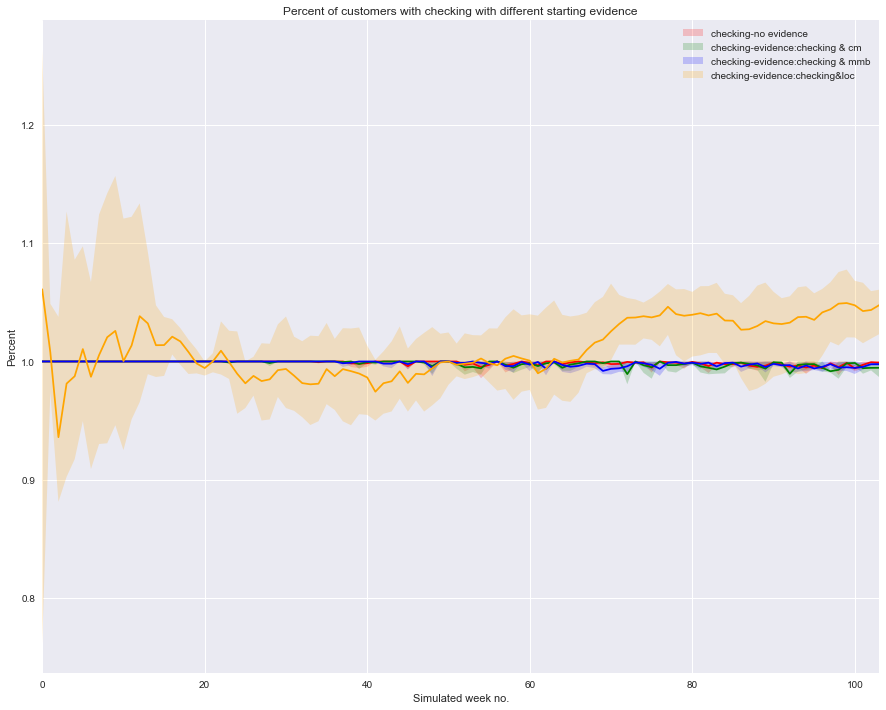

In [142]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_checking_customers_percent_no_evidence_final,value = 'checking-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_checking_customers_percent_evidence_checking_cm_final,
           value = 'cm-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_checking_customers_percent_evidence_checking_mmb_final,
           value = 'cm-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_checking_customers_percent_evidence_checking_loc_final,
           value = 'checking-evidence:checking&loc',color='orange', ci=95)
plt.legend(['checking-no evidence','checking-evidence:checking & cm','checking-evidence:checking & mmb','checking-evidence:checking&loc'])
plt.title('Percent of customers with checking with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

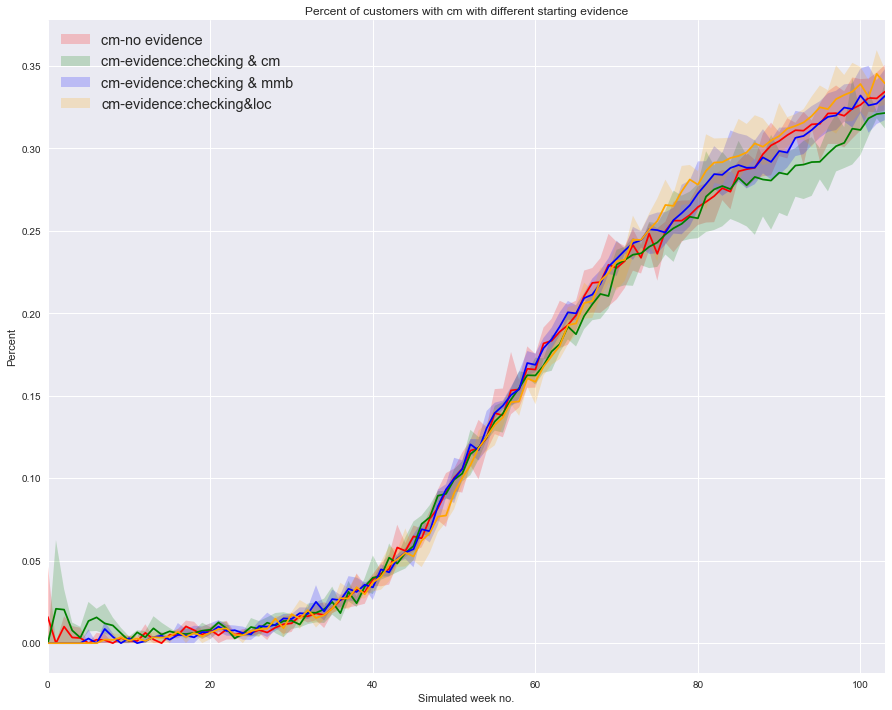

In [144]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'cm-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_cm_final,
           value = 'cm-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_mmb_final,
           value = 'cm-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_loc_final,
           value = 'cm-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cm-no evidence','cm-evidence:checking & cm','cm-evidence:checking & mmb','cm-evidence:checking&loc'],
          fontsize='large')
plt.title('Percent of customers with cm with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

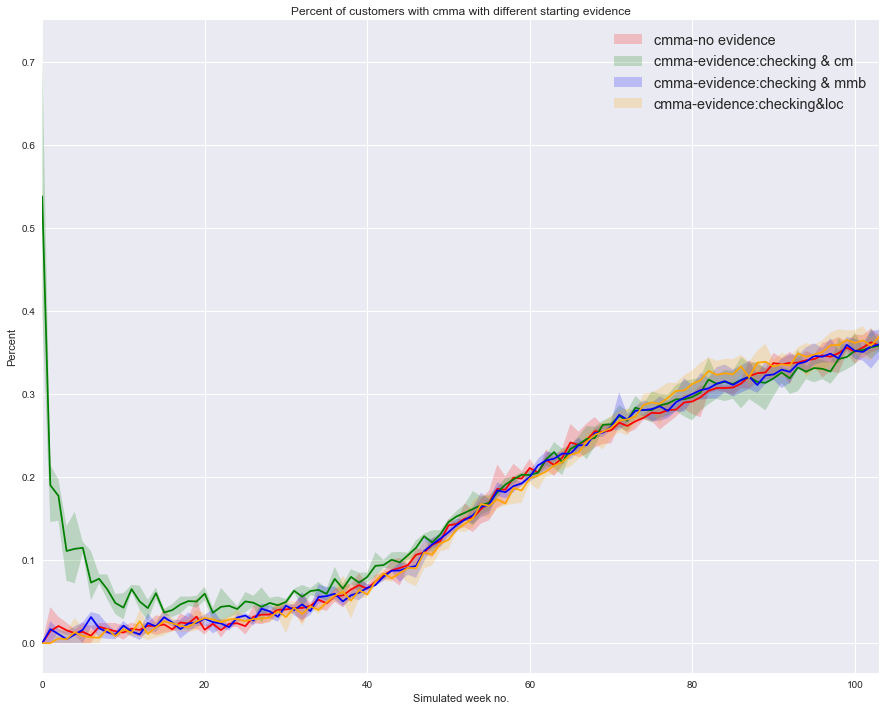

In [145]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cmma_customers_percent_no_evidence_final,value = 'cmma-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_cm_final,
           value = 'cmma-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_mmb_final,
           value = 'cmma-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_loc_final,
           value = 'cmma-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cmma-no evidence','cmma-evidence:checking & cm','cmma-evidence:checking & mmb',
            'cmma-evidence:checking&loc'],fontsize='large')
plt.title('Percent of customers with cmma with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

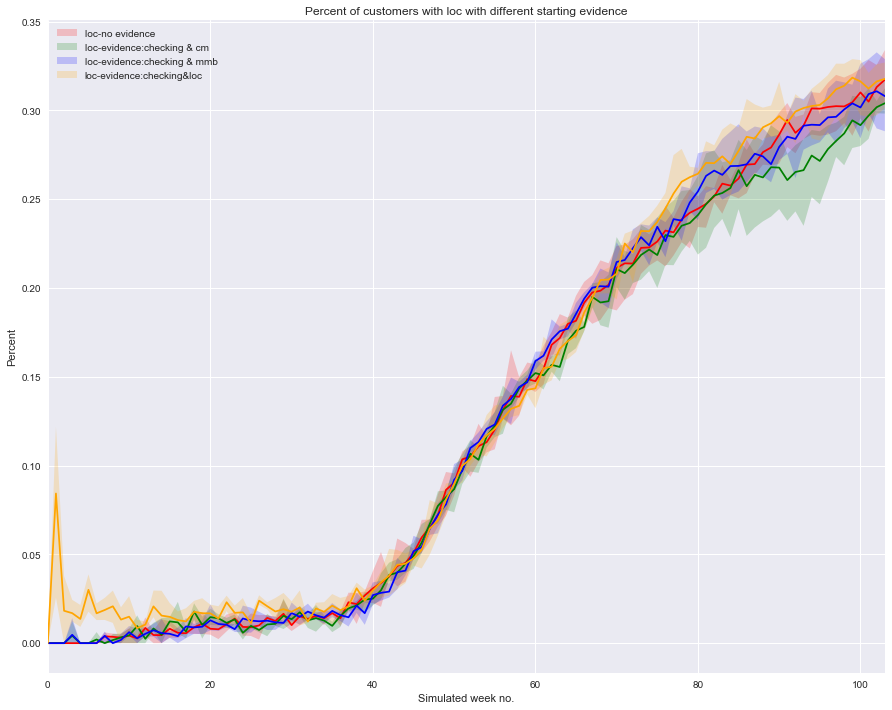

In [146]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_loc_customers_percent_no_evidence_final,value = 'loc-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_cm_final,
           value = 'loc-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_mmb_final,
           value = 'loc-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_loc_final,
           value = 'loc-evidence:checking&loc',color='orange', ci=95)
plt.legend(['loc-no evidence','loc-evidence:checking & cm','loc-evidence:checking & mmb','loc-evidence:checking&loc'])
plt.title('Percent of customers with loc with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

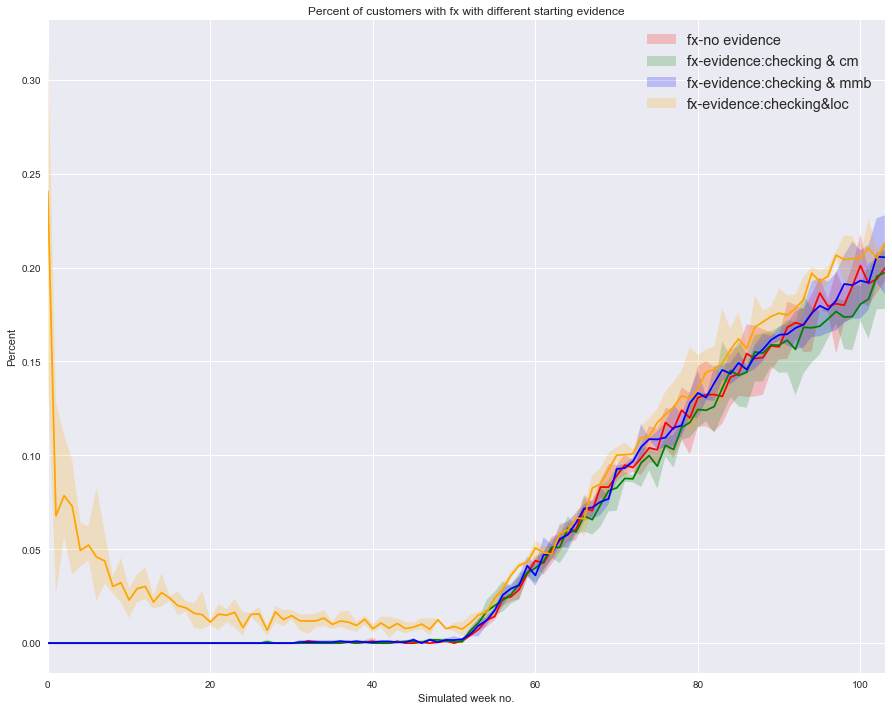

In [148]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_customers_percent_no_evidence_final,value = 'fx-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_cm_final,
           value = 'fx-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_mmb_final,
           value = 'fx-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_loc_final,
           value = 'fx-evidence:checking&loc',color='orange', ci=95)
plt.legend(['fx-no evidence','fx-evidence:checking & cm','fx-evidence:checking & mmb','fx-evidence:checking&loc'],
          fontsize='large')
plt.title('Percent of customers with fx with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

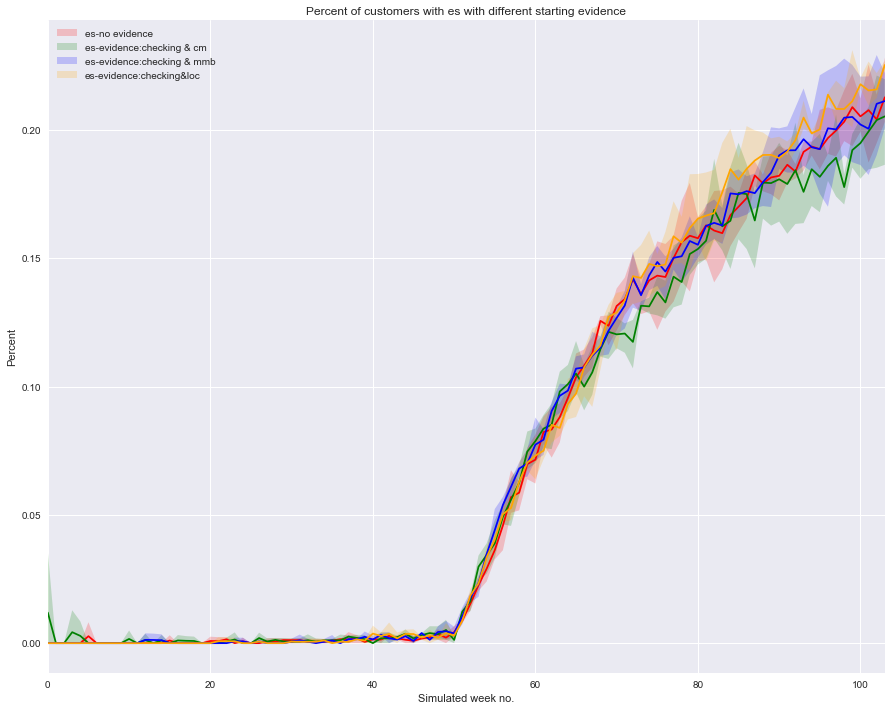

In [149]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_es_customers_percent_no_evidence_final,value = 'es-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_cm_final,
           value = 'es-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_mmb_final,
           value = 'es-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_loc_final,
           value = 'es-evidence:checking&loc',color='orange', ci=95)
plt.legend(['es-no evidence','es-evidence:checking & cm','es-evidence:checking & mmb','es-evidence:checking&loc'])
plt.title('Percent of customers with es with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

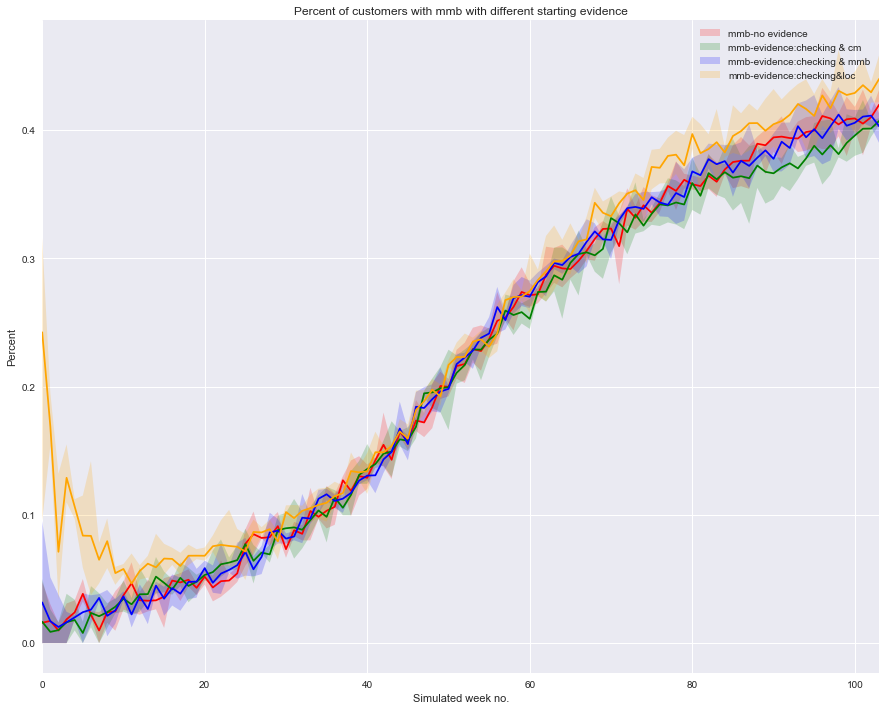

In [150]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_customers_percent_no_evidence_final,value = 'mmb-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_cm_final,
           value = 'mmb-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_mmb_final,
           value = 'mmb-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_loc_final,
           value = 'mmb-evidence:checking&loc',color='orange', ci=95)
plt.legend(['mmb-no evidence','mmb-evidence:checking & cm','mmb-evidence:checking & mmb','mmb-evidence:checking&loc'])
plt.title('Percent of customers with mmb with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

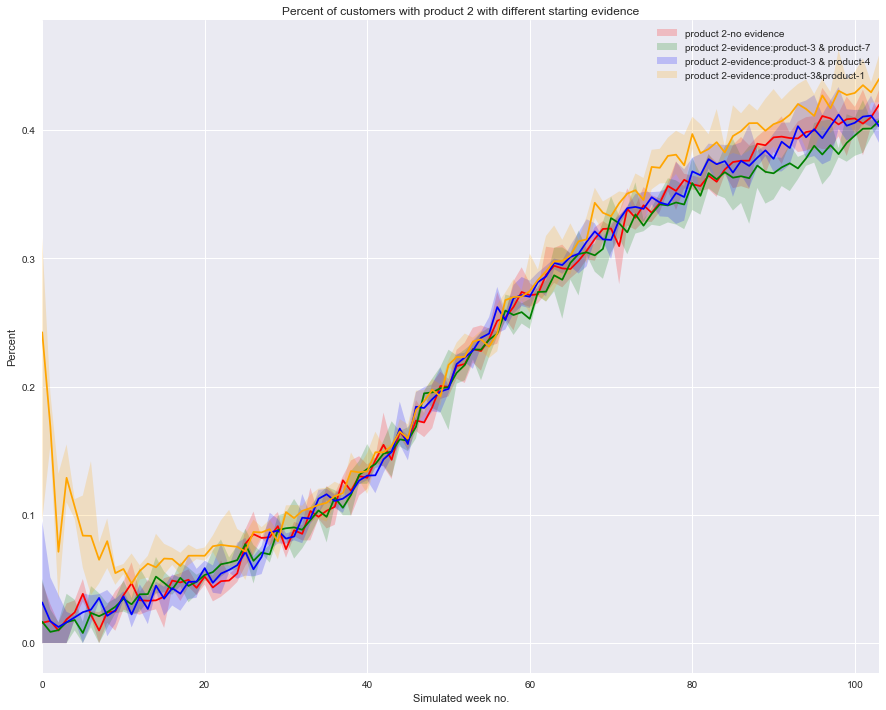

In [151]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_customers_percent_no_evidence_final,value = 'product 2-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_cm_final,
           value = 'product 2-evidence:product-3 & product-4',color='green', ci=95)
#
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_mmb_final,
           value = 'product 2-evidence:product-3 & product-7',color='blue', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_loc_final,
           value = 'product 2-evidence:product-3&product 1',color='orange', ci=95)
plt.legend(['product 2-no evidence','product 2-evidence:product-3 & product-7','product 2-evidence:product-3 & product-4',
            'product 2-evidence:product-3&product-1'])
plt.title('Percent of customers with product 2 with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

### Combo of product probabilitiies over time

In [152]:
cm_customers_percent_no_evid = pd.DataFrame(cumulative_cm_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [153]:
cmma_customers_percent_no_evid= pd.DataFrame(cumulative_cmma_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [154]:
loc_customer_percent_no_evid = pd.DataFrame(cumulative_loc_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [155]:
fx_customer_percent_no_evid = pd.DataFrame(cumulative_fx_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [156]:
es_customer_percent_no_evid = pd.DataFrame(cumulative_es_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [157]:
mmb_customer_percent_no_evid = pd.DataFrame(cumulative_mmb_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [158]:
checking_customer_percent_no_evid = pd.DataFrame(cumulative_checking_customers_percent_no_evidence_final,index=['iteration_1','iteration_2','iteration_3']).apply(
lambda x: np.mean(x),axis=0)

In [159]:
product_percent_no_evid_df = pd.DataFrame(data=np.array([cm_customers_percent_no_evid,cmma_customers_percent_no_evid, loc_customer_percent_no_evid,
                  fx_customer_percent_no_evid,es_customer_percent_no_evid,mmb_customer_percent_no_evid ,
                  checking_customer_percent_no_evid]).T,
             columns=['cm_prob','cmma_prob','loc_prob','fx_prob',"es_prob","mmb_prob","checking_prob"])

In [160]:
product_percent_no_evid_df.index.names=['week_n']

In [161]:
product_percent_no_evid_df.reset_index(inplace=True)

In [162]:
product_percent_no_evid_df.to_csv("product_probability_weekly_noEvidence.csv")

# Finally, calculate the LTV for each product with each given evidence
## First, MMB

In [163]:
def esp_client_lifetime():
        """Draws from a distribution of client lifetimes (in months) from 2013-2016.
        Return the number of weeks that a client will be alive.

        A client needs to be generating revenue for at least three months, and not
        have generated revenue for three months to be considred a
        'client lifetime'. It is possible for a single client to have Multiple
        'client lifetimes' that feed into the parameters for the Exponential
        distribution.

        Multiply the result by 4 to turn months into weeks"""
        exponential_lifetime_parameters = (2.9999999999982676, 11.500665661185888)
        return round(stats.expon(*exponential_lifetime_parameters ).rvs())*4

In [164]:
def get_average_per_time_period(sim1,sim2,sim3,sim4):
    """This is used to calculated the average across the three simulations. 
    Useful for calculting LTV without having confidence interals"""
    avg_sim1 = []
    avg_sim2 = []
    avg_sim3 = []
    avg_sim4 = []
    for week_n in range(len(sim1[0])):
        avg_sim1.append(np.mean([sim1[0][week_n], sim1[1][week_n], sim1[2][week_n]]))
    for week_n in range(len(sim2[0])):
        avg_sim2.append(np.mean([sim2[0][week_n], sim2[1][week_n], sim2[2][week_n]]))
    for week_n in range(len(sim3[0])):
        avg_sim3.append(np.mean([sim3[0][week_n], sim3[1][week_n], sim3[2][week_n]]))
    for week_n in range(len(sim4[0])):
        avg_sim4.append(np.mean([sim4[0][week_n], sim4[1][week_n], sim4[2][week_n]]))   
    return avg_sim1,avg_sim2,avg_sim3, avg_sim4

In [165]:
cumulative_mmb_customers_percent_evidence_checking_loc_final[0][1]

0.15384615384615385

In [166]:
# Get average GP and percent of customer across simulation for MMB
avg_cust_percent_mmb_no_evidence, avg_cust_percent_mmb_evidence_checking_cm,\
avg_cust_percent_mmb_evidence_checking_mmb, avg_cust_percent_mmb_evidence_checking_loc = \
get_average_per_time_period(cumulative_mmb_customers_percent_no_evidence_final,
                            cumulative_mmb_customers_percent_evidence_checking_cm_final,
                           cumulative_mmb_customers_percent_evidence_checking_mmb_final,
                           cumulative_mmb_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_mmb_no_evidence, avg_weekly_rev_mmb_evidence_checking_cm,\
avg_weekly_rev_mmb_evidence_checking_mmb, avg_weekly_rev_mmb_evidence_checking_loc = \
get_average_per_time_period(cumulative_mmb_rev_per_customer_no_evidence_final,
                            cumulative_mmb_rev_per_customer_evidence_checking_cm_final,
                           cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_mmb_rev_per_customer_evidence_checking_loc_final)






In [167]:
#go throughsimulated time for mmb customers

def ltv(avg_percent1,avg_rev1,avg_percent2,avg_rev2,avg_percent3,avg_rev3,avg_percent4,avg_rev4):
    """Generate the ltv based off the the simulation data for weekly expected GP and perent of customer with product.
    Uses the expected percent of customers to have a product at a time step multipled by the expected revenue at
    that time step"""
    
    client_lifetimes = []
    # generate 5000 customers
    for _ in range(5000):
        lifetime = esp_client_lifetime()
        if lifetime <104: # this is how long we ran our simulation for
            client_lifetimes.append(lifetime)

    total_live_clients = 0
    sim1_rev_weekly = []
    sim2_rev_weekly = []
    sim3_rev_weekly = []
    sim4_rev_weekly = []
    
    for week_n in range(int(max(client_lifetimes)+2)):
        remove_lifetimes = []
        for client_lifetime in client_lifetimes:
            if week_n>client_lifetime:
                remove_lifetimes.append(client_lifetime)

        #  customer churned
        [client_lifetimes.remove(i) for i in remove_lifetimes]
        # live clients
        total_live_clients = len(client_lifetimes)
        if round(total_live_clients * avg_percent1[week_n]) == 0:
            pass
        else:
#             clients1 = round(total_live_clients * avg_percent1[week_n])
#             print(clients1,'cleints 1')
#             print(avg_rev1[week_n],'rev week n')
            sim1_rev_weekly.append(
             avg_rev1[week_n])#/clients1)
        if round(total_live_clients * avg_percent2[week_n]) == 0:
            pass
        else:
            #clients2 = round(total_live_clients * avg_percent2[week_n])

            sim2_rev_weekly.append(
            
                 avg_rev2[week_n])#/clients2 )
        if round(total_live_clients * avg_percent3[week_n]) == 0:
            pass
        else:
            #clients3 = round(total_live_clients * avg_percent3[week_n])

            sim3_rev_weekly.append(
           
                 avg_rev3[week_n])#/clients3 )
        if round(total_live_clients * avg_percent4[week_n]) == 0:
            pass
        else:
            #clients4 = round(total_live_clients * avg_percent4[week_n])

            sim4_rev_weekly.append(
 
                 avg_rev4[week_n])#/#clients4 )
    return sum(sim1_rev_weekly),sum(sim2_rev_weekly),sum(sim3_rev_weekly),sum(sim4_rev_weekly)
        

In [168]:
#go throughsimulated time for mmb customers

def expected_ltv(avg_percent1,avg_rev1,avg_percent2,avg_rev2,avg_percent3,avg_rev3,avg_percent4,avg_rev4):
    """Generate the ltv based off the the simulation data for weekly expected GP and perent of customer with product.
    Uses the expected percent of customers to have a product at a time step multipled by the expected revenue at
    that time step.
    Using expectation of the number of clients who have this product"""
    
    client_lifetimes = []
    # generate 5000 customers
    for _ in range(5000):
        lifetime = esp_client_lifetime()
        if lifetime <104: # this is how long we ran our simulation for
            client_lifetimes.append(lifetime)

    total_live_clients = 0
    sim1_rev_weekly = []
    sim2_rev_weekly = []
    sim3_rev_weekly = []
    sim4_rev_weekly = []
    
    for week_n in range(int(max(client_lifetimes)+2)):
        remove_lifetimes = []
        for client_lifetime in client_lifetimes:
            if week_n>client_lifetime:
                remove_lifetimes.append(client_lifetime)

        #  customer churned
        [client_lifetimes.remove(i) for i in remove_lifetimes]
        # live clients
        total_live_clients = len(client_lifetimes)
        if round(total_live_clients * avg_percent1[week_n]) == 0:
            pass
        else:
#             clients1 = round(total_live_clients * avg_percent1[week_n])
#             print(clients1,'cleints 1')
#             print(avg_rev1[week_n],'rev week n')
            sim1_rev_weekly.append(
             avg_rev1[week_n]* avg_percent1[week_n])#/clients1)
        if round(total_live_clients * avg_percent2[week_n]) == 0:
            pass
        else:
            #clients2 = round(total_live_clients * avg_percent2[week_n])

            sim2_rev_weekly.append(
            
                 avg_rev2[week_n]* avg_percent2[week_n])#/clients2 )
        if round(total_live_clients * avg_percent3[week_n]) == 0:
            pass
        else:
            #clients3 = round(total_live_clients * avg_percent3[week_n])

            sim3_rev_weekly.append(
           
                 avg_rev3[week_n]* avg_percent3[week_n])#/clients3 )
        if round(total_live_clients * avg_percent4[week_n]) == 0:
            pass
        else:
            #clients4 = round(total_live_clients * avg_percent4[week_n])

            sim4_rev_weekly.append(
 
                 avg_rev4[week_n]* avg_percent4[week_n])#/#clients4 )
    return sum(sim1_rev_weekly),sum(sim2_rev_weekly),sum(sim3_rev_weekly),sum(sim4_rev_weekly)
        

In [169]:
#go throughsimulated time for mmb customers

def expected_ltv_loc(avg_percent1,avg_rev1,avg_percent2,avg_rev2,avg_percent3,avg_rev3,avg_percent4,avg_rev4):
    """Generate the ltv based off the the simulation data for weekly expected GP and perent of customer with product.
    Use a exponential distribution, not enoug hdata for expon weibull.
    Also, compute NPV of revenue.
    Uses expectation of number of clients that have this product
    """
    

    federal_funds_rate = .0075 # May 11, 2017
    inflation_rate = .025 # March 2017
    def yearly_to_weekly_interest_rate_conversion(yearly_interest_rate=federal_funds_rate+inflation_rate):
        """Convert from a yearly rate to a weekly rate using the following
        equation.
        Effective rate for period = (1 + annual rate)**(1 / # of periods) – 1
        """
        weekly_interest_rate  = ((1 + yearly_interest_rate)**(1/52))-1
        return weekly_interest_rate
    weekly_interest = yearly_to_weekly_interest_rate_conversion()
    
    def letters_of_credit_weekly_rev( week_n,one = -663.9800000000298, two = 869.07882491183921,
                                     interest =weekly_interest ):
        """ This gives a predicted weekly GP from and Exponential  distribution.
        The default parameters here are from 2016.
        Also, performs the NPV calculation"""
        loc_mweekly = stats.expon.rvs(one,two)/4
        total_wekly_rev = loc_mweekly / (1+interest)**week_n
        return total_wekly_rev
        
    client_lifetimes = []
    # generate 5000 customers
    for _ in range(5000):
        lifetime = esp_client_lifetime()
        if lifetime <104: # this is how long we ran our simulation for
            client_lifetimes.append(lifetime)

    total_live_clients = 0
    sim1_rev_weekly = []
    sim2_rev_weekly = []
    sim3_rev_weekly = []
    sim4_rev_weekly = []
    
    for week_n in range(int(max(client_lifetimes)+2)):
        remove_lifetimes = []
        for client_lifetime in client_lifetimes:
            if week_n>client_lifetime:
                remove_lifetimes.append(client_lifetime)


        [client_lifetimes.remove(i) for i in remove_lifetimes]
        total_live_clients = len(client_lifetimes)
        if round(total_live_clients * avg_percent1[week_n]) == 0:
            pass
        else:
            #clients1 = round(total_live_clients * avg_percent1[week_n])

            sim1_rev_weekly.append(
              letters_of_credit_weekly_rev(week_n)* avg_percent1[week_n])#/clients1)
        if round(total_live_clients * avg_percent2[week_n]) == 0:
            pass
        else:
            #clients2 = round(total_live_clients * avg_percent2[week_n])

            sim2_rev_weekly.append(
             
                 letters_of_credit_weekly_rev(week_n)* avg_percent1[week_n])#/clients2 )
        if round(total_live_clients * avg_percent3[week_n]) == 0:
            pass
        else:
            #clients3 = round(total_live_clients * avg_percent3[week_n])

            sim3_rev_weekly.append(
       
                 letters_of_credit_weekly_rev(week_n)* avg_percent1[week_n])#/clients3 )
        if round(total_live_clients * avg_percent4[week_n]) == 0:
            pass
        else:
            #clients4 = round(total_live_clients * avg_percent4[week_n])

            sim4_rev_weekly.append(
        
                 letters_of_credit_weekly_rev(week_n)* avg_percent1[week_n])#/clients4 )
    return sum(sim1_rev_weekly),sum(sim2_rev_weekly),sum(sim3_rev_weekly),sum(sim4_rev_weekly)
        

In [170]:
#go throughsimulated time for mmb customers

def ltv_loc(avg_percent1,avg_rev1,avg_percent2,avg_rev2,avg_percent3,avg_rev3,avg_percent4,avg_rev4):
    """Generate the ltv based off the the simulation data for weekly expected GP and perent of customer with product.
    Use a exponential distribution, not enoug hdata for expon weibull.
    Also, compute NPV of revenue.
    """
    

    federal_funds_rate = .0075 # May 11, 2017
    inflation_rate = .025 # March 2017
    def yearly_to_weekly_interest_rate_conversion(yearly_interest_rate=federal_funds_rate+inflation_rate):
        """Convert from a yearly rate to a weekly rate using the following
        equation.
        Effective rate for period = (1 + annual rate)**(1 / # of periods) – 1
        """
        weekly_interest_rate  = ((1 + yearly_interest_rate)**(1/52))-1
        return weekly_interest_rate
    weekly_interest = yearly_to_weekly_interest_rate_conversion()
    
    def letters_of_credit_weekly_rev( week_n,one = -663.9800000000298, two = 869.07882491183921,
                                     interest =weekly_interest ):
        """ This gives a predicted weekly GP from and Exponential  distribution.
        The default parameters here are from 2016.
        Also, performs the NPV calculation"""
        loc_mweekly = stats.expon.rvs(one,two)/4
        total_wekly_rev = loc_mweekly / (1+interest)**week_n
        return total_wekly_rev
        
    client_lifetimes = []
    # generate 5000 customers
    for _ in range(5000):
        lifetime = esp_client_lifetime()
        if lifetime <104: # this is how long we ran our simulation for
            client_lifetimes.append(lifetime)

    total_live_clients = 0
    sim1_rev_weekly = []
    sim2_rev_weekly = []
    sim3_rev_weekly = []
    sim4_rev_weekly = []
    
    for week_n in range(int(max(client_lifetimes)+2)):
        remove_lifetimes = []
        for client_lifetime in client_lifetimes:
            if week_n>client_lifetime:
                remove_lifetimes.append(client_lifetime)


        [client_lifetimes.remove(i) for i in remove_lifetimes]
        total_live_clients = len(client_lifetimes)
        if round(total_live_clients * avg_percent1[week_n]) == 0:
            pass
        else:
            #clients1 = round(total_live_clients * avg_percent1[week_n])

            sim1_rev_weekly.append(
              letters_of_credit_weekly_rev(week_n))#/clients1)
        if round(total_live_clients * avg_percent2[week_n]) == 0:
            pass
        else:
            #clients2 = round(total_live_clients * avg_percent2[week_n])

            sim2_rev_weekly.append(
             
                 letters_of_credit_weekly_rev(week_n))#/clients2 )
        if round(total_live_clients * avg_percent3[week_n]) == 0:
            pass
        else:
            #clients3 = round(total_live_clients * avg_percent3[week_n])

            sim3_rev_weekly.append(
       
                 letters_of_credit_weekly_rev(week_n))#/clients3 )
        if round(total_live_clients * avg_percent4[week_n]) == 0:
            pass
        else:
            #clients4 = round(total_live_clients * avg_percent4[week_n])

            sim4_rev_weekly.append(
        
                 letters_of_credit_weekly_rev(week_n))#/clients4 )
    return sum(sim1_rev_weekly),sum(sim2_rev_weekly),sum(sim3_rev_weekly),sum(sim4_rev_weekly)
        

In [171]:
ltv_mmb_no_evidence, ltv_mmb_evidence_checking_cm,ltv_mmb_evidence_checking_mmb, ltv_mmb_evidence_checking_loc  = \
ltv(avg_cust_percent_mmb_no_evidence,avg_weekly_rev_mmb_no_evidence,
   avg_cust_percent_mmb_evidence_checking_cm, avg_weekly_rev_mmb_evidence_checking_cm,
   avg_cust_percent_mmb_evidence_checking_mmb, avg_weekly_rev_mmb_evidence_checking_mmb,
   avg_cust_percent_mmb_evidence_checking_loc, avg_weekly_rev_mmb_evidence_checking_loc)

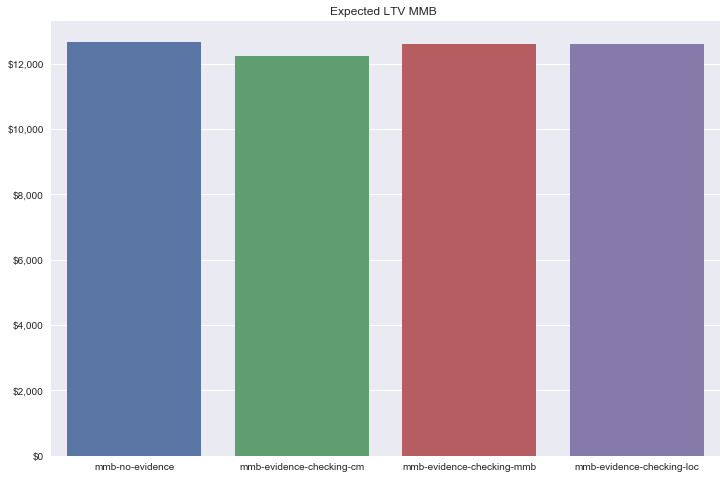

In [172]:
plt.figure(figsize=(12,8))
plt.title('Expected LTV MMB ')
fig = sns.barplot(x=['mmb-no-evidence','mmb-evidence-checking-cm','mmb-evidence-checking-mmb','mmb-evidence-checking-loc'],
           y=[ltv_mmb_no_evidence,ltv_mmb_evidence_checking_cm, ltv_mmb_evidence_checking_loc,
              ltv_mmb_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

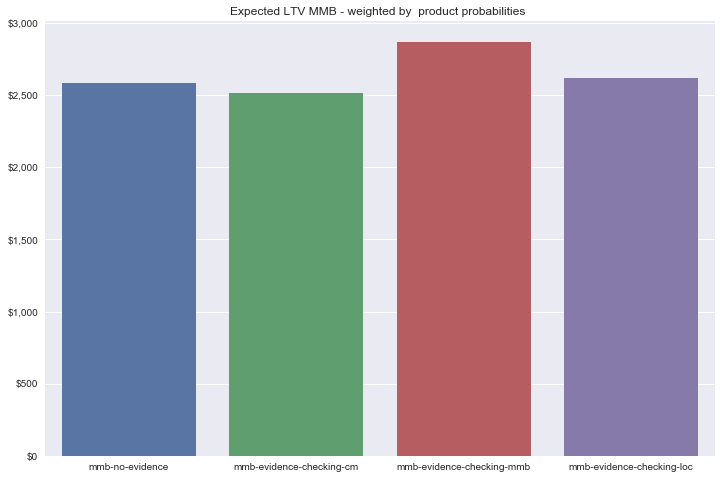

In [173]:
ltv_mmb_no_evidence_expect, ltv_mmb_evidence_checking_cm_expect,ltv_mmb_evidence_checking_mmb_expect, ltv_mmb_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_mmb_no_evidence,avg_weekly_rev_mmb_no_evidence,
   avg_cust_percent_mmb_evidence_checking_cm, avg_weekly_rev_mmb_evidence_checking_cm,
   avg_cust_percent_mmb_evidence_checking_mmb, avg_weekly_rev_mmb_evidence_checking_mmb,
   avg_cust_percent_mmb_evidence_checking_loc, avg_weekly_rev_mmb_evidence_checking_loc)

plt.figure(figsize=(12,8))
plt.title('Expected LTV MMB - weighted by  product probabilities ')
fig = sns.barplot(x=['mmb-no-evidence','mmb-evidence-checking-cm','mmb-evidence-checking-mmb','mmb-evidence-checking-loc'],
           y=[ltv_mmb_no_evidence_expect,ltv_mmb_evidence_checking_cm_expect, ltv_mmb_evidence_checking_loc_expect,
              ltv_mmb_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

In [174]:
print('mmb no evidence',ltv_mmb_no_evidence,'mmb evidece = checking cm',ltv_mmb_evidence_checking_cm, 
      'ltv mmb evidence checking loc',ltv_mmb_evidence_checking_loc,
           'ltv mmb evidence checking mmb',   ltv_mmb_evidence_checking_mmb)

mmb no evidence 12679.6942804 mmb evidece = checking cm 12234.1363815 ltv mmb evidence checking loc 12610.0143206 ltv mmb evidence checking mmb 12609.7963253


## Next, ES

In [175]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_es_no_evidence, avg_cust_percent_es_evidence_checking_cm,\
avg_cust_percent_es_evidence_checking_mmb, avg_cust_percent_es_evidence_checking_loc = \
get_average_per_time_period(cumulative_es_customers_percent_no_evidence_final,
                            cumulative_es_customers_percent_evidence_checking_cm_final,
                           cumulative_es_customers_percent_evidence_checking_mmb_final,
                           cumulative_es_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_es_no_evidence, avg_weekly_rev_es_evidence_checking_cm,\
avg_weekly_rev_es_evidence_checking_mmb, avg_weekly_rev_es_evidence_checking_loc = \
get_average_per_time_period(cumulative_es_rev_per_customer_no_evidence_final,
                            cumulative_es_rev_per_customer_evidence_checking_cm_final,
                           cumulative_es_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_es_rev_per_customer_evidence_checking_loc_final)






In [176]:
ltv_es_no_evidence, ltv_es_evidence_checking_cm,ltv_es_evidence_checking_mmb, ltv_es_evidence_checking_loc  = \
ltv(avg_cust_percent_es_no_evidence,avg_weekly_rev_es_no_evidence,
   avg_cust_percent_es_evidence_checking_cm, avg_weekly_rev_es_evidence_checking_cm,
   avg_cust_percent_es_evidence_checking_mmb, avg_weekly_rev_es_evidence_checking_mmb,
   avg_cust_percent_es_evidence_checking_loc, avg_weekly_rev_es_evidence_checking_loc)

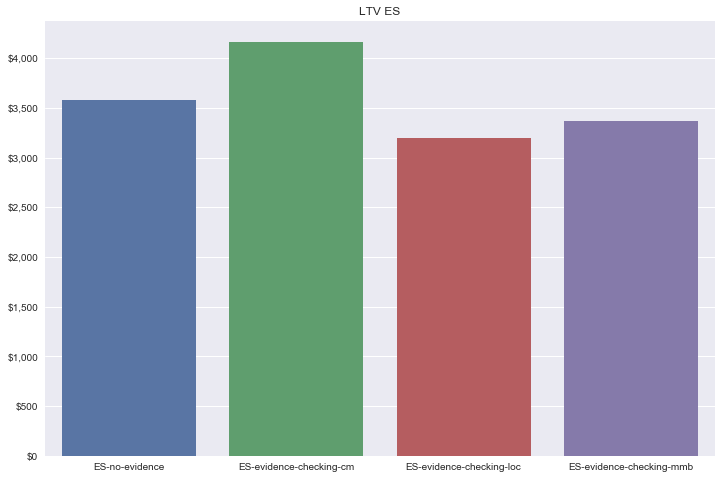

In [177]:
plt.figure(figsize=(12,8))
plt.title('LTV ES')
fig = sns.barplot(x=[ 'ES-no-evidence', 'ES-evidence-checking-cm', 'ES-evidence-checking-loc', 'ES-evidence-checking-mmb'],
           y=[ltv_es_no_evidence,ltv_es_evidence_checking_cm, ltv_es_evidence_checking_loc,
              ltv_es_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

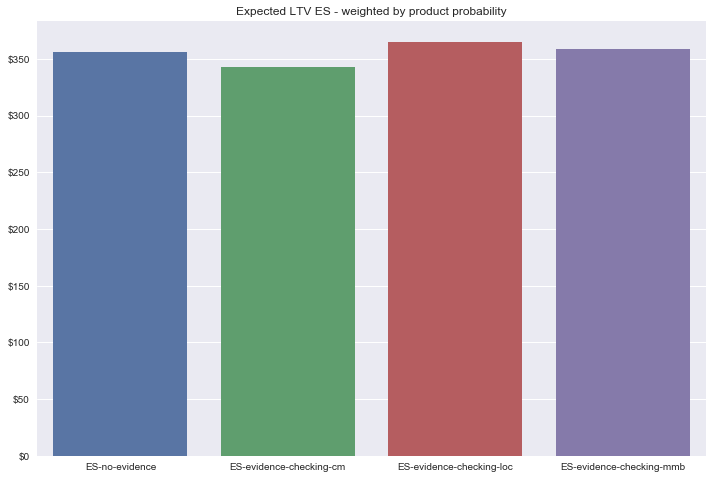

In [178]:
ltv_es_no_evidence_expect, ltv_es_evidence_checking_cm_expect,ltv_es_evidence_checking_mmb_expect, ltv_es_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_es_no_evidence,avg_weekly_rev_es_no_evidence,
   avg_cust_percent_es_evidence_checking_cm, avg_weekly_rev_es_evidence_checking_cm,
   avg_cust_percent_es_evidence_checking_mmb, avg_weekly_rev_es_evidence_checking_mmb,
   avg_cust_percent_es_evidence_checking_loc, avg_weekly_rev_es_evidence_checking_loc)

plt.figure(figsize=(12,8))
plt.title('Expected LTV ES - weighted by product probability')
fig = sns.barplot(x=[ 'ES-no-evidence', 'ES-evidence-checking-cm', 'ES-evidence-checking-loc', 'ES-evidence-checking-mmb'],
           y=[ltv_es_no_evidence_expect,ltv_es_evidence_checking_cm_expect, ltv_es_evidence_checking_loc_expect,
              ltv_es_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

In [179]:
print(ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb)

NameError: name 'ltv_checking_no_evidence' is not defined

# Next, CM

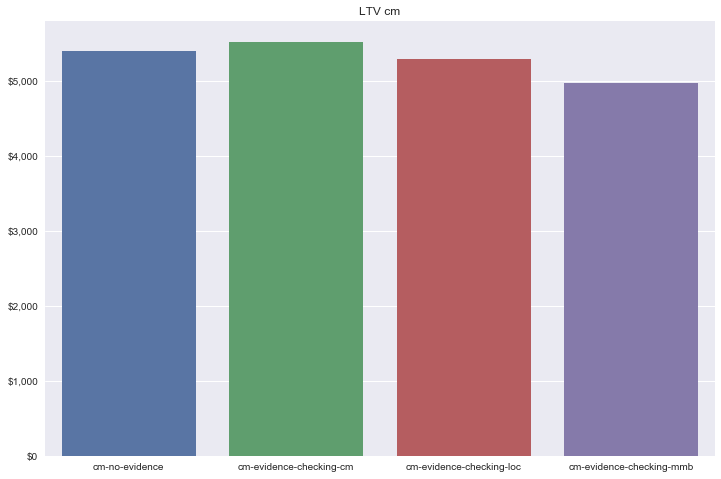

In [182]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_cm_no_evidence, avg_cust_percent_cm_evidence_checking_cm,\
avg_cust_percent_cm_evidence_checking_mmb, avg_cust_percent_cm_evidence_checking_loc = \
get_average_per_time_period(cumulative_cm_customers_percent_no_evidence_final,
                            cumulative_cm_customers_percent_evidence_checking_cm_final,
                           cumulative_cm_customers_percent_evidence_checking_mmb_final,
                           cumulative_cm_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_cm_no_evidence, avg_weekly_rev_cm_evidence_checking_cm,\
avg_weekly_rev_cm_evidence_checking_mmb, avg_weekly_rev_cm_evidence_checking_loc = \
get_average_per_time_period(cumulative_cm_rev_per_customer_no_evidence_final,
                            cumulative_cm_rev_per_customer_evidence_checking_cm_final,
                           cumulative_cm_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_cm_rev_per_customer_evidence_checking_loc_final)




ltv_cm_no_evidence, ltv_cm_evidence_checking_cm,ltv_cm_evidence_checking_mmb, ltv_cm_evidence_checking_loc  = \
ltv(avg_cust_percent_cm_no_evidence, avg_weekly_rev_cm_no_evidence,
   avg_cust_percent_cm_evidence_checking_cm, avg_weekly_rev_cm_evidence_checking_cm,
   avg_cust_percent_cm_evidence_checking_mmb, avg_weekly_rev_cm_evidence_checking_mmb,
   avg_cust_percent_cm_evidence_checking_loc, avg_weekly_rev_cm_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV cm')
fig = sns.barplot(x=['cm-no-evidence','cm-evidence-checking-cm','cm-evidence-checking-loc','cm-evidence-checking-mmb'],
           y=[ltv_cm_no_evidence,ltv_cm_evidence_checking_cm, ltv_cm_evidence_checking_loc,
              ltv_cm_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

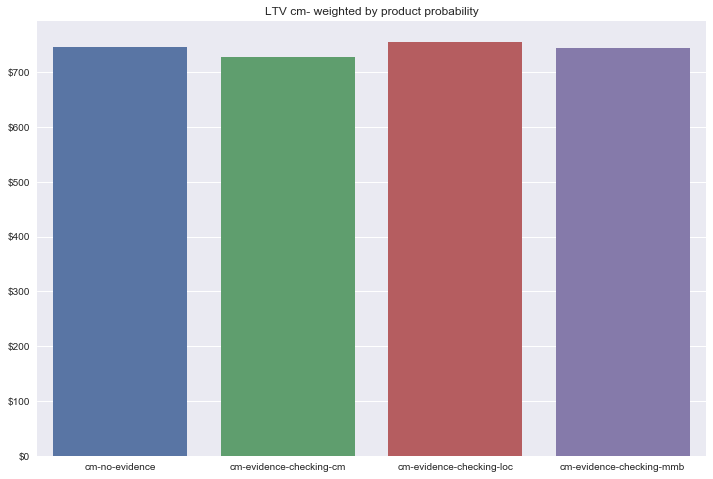

In [183]:
ltv_cm_no_evidence_expect, ltv_cm_evidence_checking_cm_expect,ltv_cm_evidence_checking_mmb_expect, ltv_cm_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_cm_no_evidence, avg_weekly_rev_cm_no_evidence,
   avg_cust_percent_cm_evidence_checking_cm, avg_weekly_rev_cm_evidence_checking_cm,
   avg_cust_percent_cm_evidence_checking_mmb, avg_weekly_rev_cm_evidence_checking_mmb,
   avg_cust_percent_cm_evidence_checking_loc, avg_weekly_rev_cm_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV cm- weighted by product probability')
fig = sns.barplot(x=['cm-no-evidence','cm-evidence-checking-cm','cm-evidence-checking-loc','cm-evidence-checking-mmb'],
           y=[ltv_cm_no_evidence_expect,ltv_cm_evidence_checking_cm_expect, ltv_cm_evidence_checking_loc_expect,
              ltv_cm_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

In [184]:
print('ltv cm no evidence',ltv_cm_no_evidence,'cm evidece = checking cm',ltv_cm_evidence_checking_cm, 
      'ltv cm evidence=checking loc',ltv_cm_evidence_checking_loc,
           'ltv cm evidence =checking mmb',   ltv_cm_evidence_checking_mmb)

ltv cm no evidence 5394.00108291 cm evidece = checking cm 5518.30106165 ltv cm evidence=checking loc 5282.45999307 ltv cm evidence =checking mmb 4967.07730739


# Next, FX

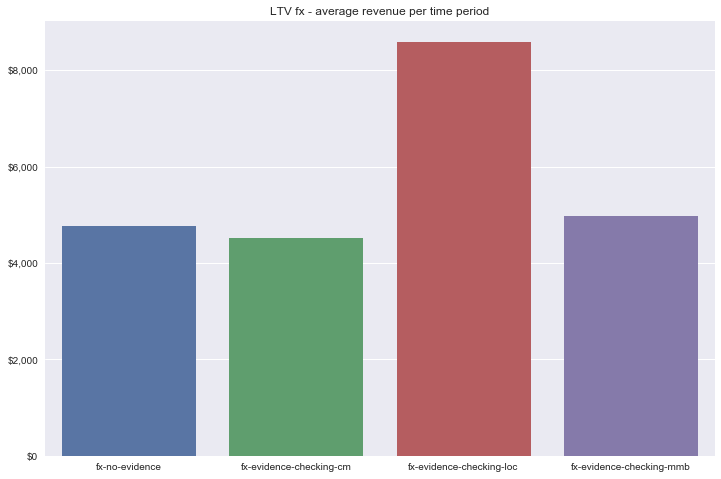

In [185]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_fx_no_evidence, avg_cust_percent_fx_evidence_checking_cm,\
avg_cust_percent_fx_evidence_checking_mmb, avg_cust_percent_fx_evidence_checking_loc = \
get_average_per_time_period(cumulative_fx_customers_percent_no_evidence_final,
                            cumulative_fx_customers_percent_evidence_checking_cm_final,
                           cumulative_fx_customers_percent_evidence_checking_mmb_final,
                           cumulative_fx_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_fx_no_evidence, avg_weekly_rev_fx_evidence_checking_cm,\
avg_weekly_rev_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_loc = \
get_average_per_time_period(cumulative_fx_rev_per_customer_no_evidence_final,
                            cumulative_fx_rev_per_customer_evidence_checking_cm_final,
                           cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_fx_rev_per_customer_evidence_checking_loc_final)




ltv_fx_no_evidence, ltv_fx_evidence_checking_cm,ltv_fx_evidence_checking_mmb, ltv_fx_evidence_checking_loc  = \
ltv(avg_cust_percent_fx_no_evidence,avg_weekly_rev_fx_no_evidence,
   avg_cust_percent_fx_evidence_checking_cm, avg_weekly_rev_fx_evidence_checking_cm,
   avg_cust_percent_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_mmb,
   avg_cust_percent_fx_evidence_checking_loc, avg_weekly_rev_fx_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV fx - average revenue per time period')
fig = sns.barplot(x=['fx-no-evidence','fx-evidence-checking-cm','fx-evidence-checking-loc','fx-evidence-checking-mmb'],
           y=[ltv_fx_no_evidence,ltv_fx_evidence_checking_cm, ltv_fx_evidence_checking_loc,
              ltv_fx_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

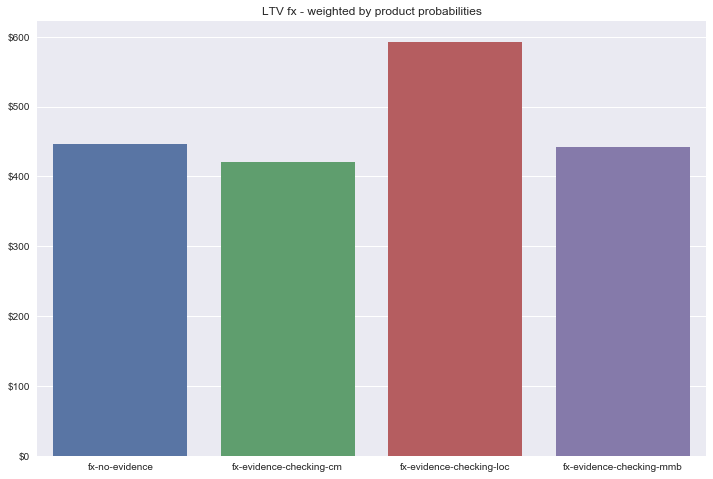

In [186]:
ltv_fx_no_evidence_expect, ltv_fx_evidence_checking_cm_expect,ltv_fx_evidence_checking_mmb_expect,\
ltv_fx_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_fx_no_evidence,avg_weekly_rev_fx_no_evidence,
   avg_cust_percent_fx_evidence_checking_cm, avg_weekly_rev_fx_evidence_checking_cm,
   avg_cust_percent_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_mmb,
   avg_cust_percent_fx_evidence_checking_loc, avg_weekly_rev_fx_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV fx - weighted by product probabilities')
fig = sns.barplot(x=['fx-no-evidence','fx-evidence-checking-cm','fx-evidence-checking-loc','fx-evidence-checking-mmb'],
           y=[ltv_fx_no_evidence_expect,ltv_fx_evidence_checking_cm_expect, ltv_fx_evidence_checking_loc_expect,
              ltv_fx_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

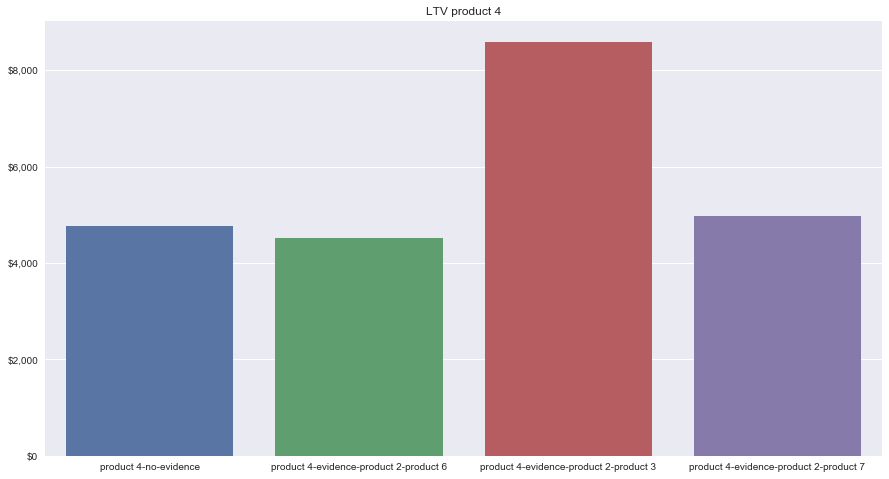

In [187]:
plt.figure(figsize=(15,8))
plt.title('LTV product 4')
fig = sns.barplot(x=['product 4-no-evidence','product 4-evidence-product 2-product 6',
                     'product 4-evidence-product 2-product 3','product 4-evidence-product 2-product 7'],
           y=[ltv_fx_no_evidence,ltv_fx_evidence_checking_cm, ltv_fx_evidence_checking_loc,
              ltv_fx_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

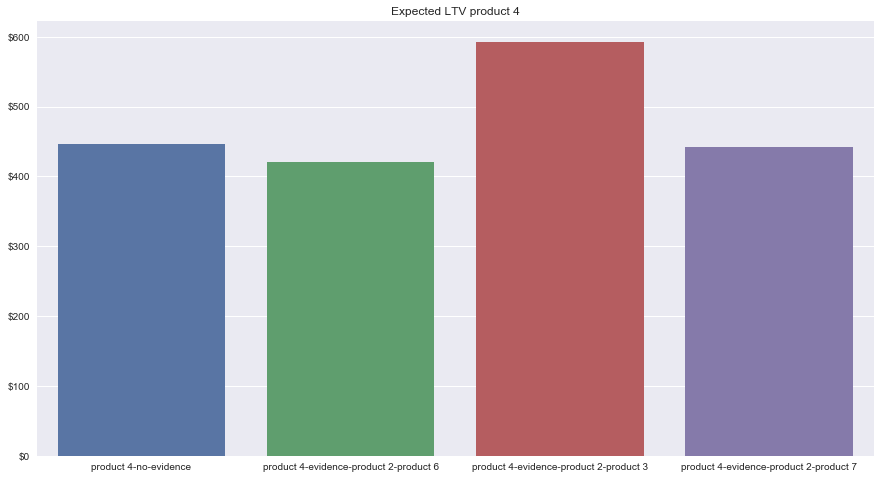

In [188]:
ltv_fx_no_evidence_expect, ltv_fx_evidence_checking_cm_expect,ltv_fx_evidence_checking_mmb_expect,\
ltv_fx_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_fx_no_evidence,avg_weekly_rev_fx_no_evidence,
   avg_cust_percent_fx_evidence_checking_cm, avg_weekly_rev_fx_evidence_checking_cm,
   avg_cust_percent_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_mmb,
   avg_cust_percent_fx_evidence_checking_loc, avg_weekly_rev_fx_evidence_checking_loc)


plt.figure(figsize=(15,8))
plt.title('Expected LTV product 4')
fig = sns.barplot(x=['product 4-no-evidence','product 4-evidence-product 2-product 6',
                     'product 4-evidence-product 2-product 3','product 4-evidence-product 2-product 7'],
           y=[ltv_fx_no_evidence_expect,ltv_fx_evidence_checking_cm_expect, ltv_fx_evidence_checking_loc_expect,
              ltv_fx_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

In [189]:
print('ltv fx no evidence',ltv_fx_no_evidence,'fx evidece = checking cm',ltv_fx_evidence_checking_cm, 
      'ltv fx evidence=checking loc',ltv_fx_evidence_checking_loc,
           'ltv fx evidence =checking mmb',   ltv_fx_evidence_checking_mmb)

ltv fx no evidence 4770.85185383 fx evidece = checking cm 4519.67549546 ltv fx evidence=checking loc 8594.28153647 ltv fx evidence =checking mmb 4973.28863528


## Next, checking

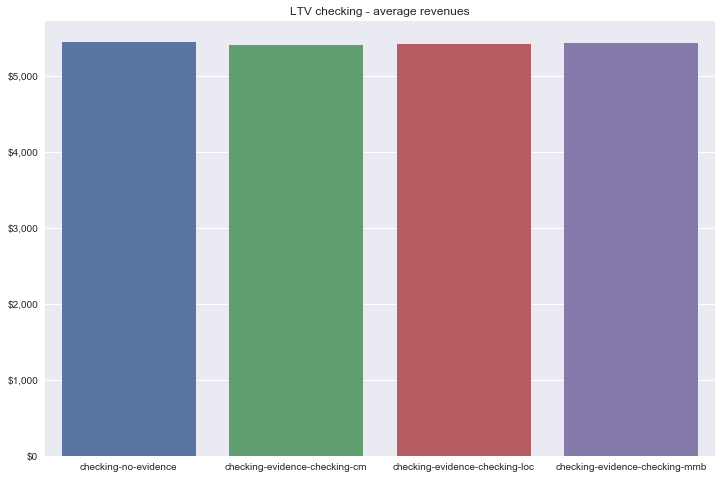

In [190]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_checking_no_evidence, avg_cust_percent_checking_evidence_checking_cm,\
avg_cust_percent_checking_evidence_checking_mmb, avg_cust_percent_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_customers_percent_no_evidence_final,
                            cumulative_checking_customers_percent_evidence_checking_cm_final,
                           cumulative_checking_customers_percent_evidence_checking_mmb_final,
                           cumulative_checking_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_checking_no_evidence, avg_weekly_rev_checking_evidence_checking_cm,\
avg_weekly_rev_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_rev_per_customer_no_evidence_final,
                            cumulative_checking_rev_per_customer_evidence_checking_cm_final,
                           cumulative_checking_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_checking_rev_per_customer_evidence_checking_loc_final)




ltv_checking_no_evidence, ltv_checking_evidence_checking_cm,ltv_checking_evidence_checking_mmb, ltv_checking_evidence_checking_loc  = \
ltv(avg_cust_percent_checking_no_evidence,avg_weekly_rev_checking_no_evidence,
   avg_cust_percent_checking_evidence_checking_cm, avg_weekly_rev_checking_evidence_checking_cm,
   avg_cust_percent_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_mmb,
   avg_cust_percent_checking_evidence_checking_loc, avg_weekly_rev_checking_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV checking - average revenues')
fig = sns.barplot(x=['checking-no-evidence','checking-evidence-checking-cm','checking-evidence-checking-loc',
               'checking-evidence-checking-mmb'],
           y=[ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

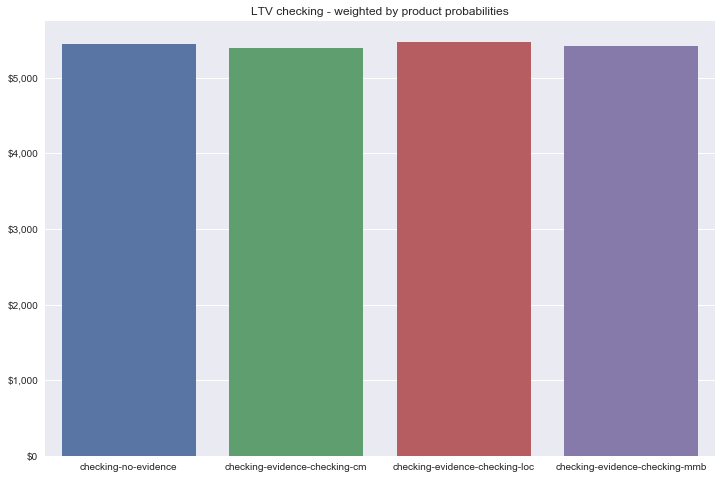

In [191]:

ltv_checking_no_evidence_expect, ltv_checking_evidence_checking_cm_expect,ltv_checking_evidence_checking_mmb_expect, ltv_checking_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_checking_no_evidence,avg_weekly_rev_checking_no_evidence,
   avg_cust_percent_checking_evidence_checking_cm, avg_weekly_rev_checking_evidence_checking_cm,
   avg_cust_percent_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_mmb,
   avg_cust_percent_checking_evidence_checking_loc, avg_weekly_rev_checking_evidence_checking_loc)

plt.figure(figsize=(12,8))
plt.title('LTV checking - weighted by product probabilities')
fig = sns.barplot(x=['checking-no-evidence','checking-evidence-checking-cm','checking-evidence-checking-loc',
               'checking-evidence-checking-mmb'],
           y=[ltv_checking_no_evidence_expect,ltv_checking_evidence_checking_cm_expect, ltv_checking_evidence_checking_loc_expect,
              ltv_checking_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

In [192]:
print('ltv checking no evidence',ltv_checking_no_evidence,'checking evidece = checking cm',ltv_checking_evidence_checking_cm, 
      'ltv checking evidence=checking loc',ltv_checking_evidence_checking_loc,
           'ltv checking evidence =checking mmb',   ltv_checking_evidence_checking_mmb)

ltv checking no evidence 5452.6528343 checking evidece = checking cm 5406.05185819 ltv checking evidence=checking loc 5418.87338532 ltv checking evidence =checking mmb 5433.07451916


## Next, loc
### There are huge fluctuations in revenue for LOC, used the time adjusted revenue from an exponential distribution in lieu of a simulation framework

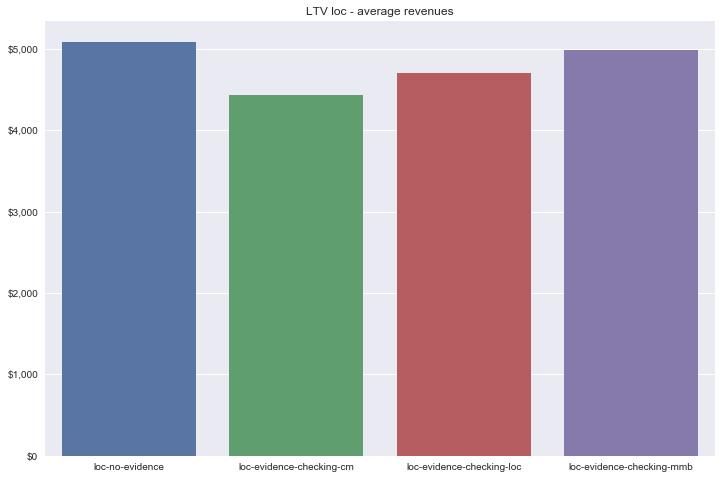

In [194]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_loc_no_evidence, avg_cust_percent_loc_evidence_checking_cm,\
avg_cust_percent_loc_evidence_checking_mmb, avg_cust_percent_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_customers_percent_no_evidence_final,
                            cumulative_loc_customers_percent_evidence_checking_cm_final,
                           cumulative_loc_customers_percent_evidence_checking_mmb_final,
                           cumulative_loc_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_loc_no_evidence, avg_weekly_rev_loc_evidence_checking_cm,\
avg_weekly_rev_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_rev_per_customer_no_evidence_final,
                            cumulative_loc_rev_per_customer_evidence_checking_cm_final,
                           cumulative_loc_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_loc_rev_per_customer_evidence_checking_loc_final)




ltv_loc_no_evidence, ltv_loc_evidence_checking_cm,ltv_loc_evidence_checking_mmb, ltv_loc_evidence_checking_loc  = \
ltv(avg_cust_percent_loc_no_evidence,avg_weekly_rev_checking_no_evidence,
   avg_cust_percent_loc_evidence_checking_cm, avg_weekly_rev_loc_evidence_checking_cm,
   avg_cust_percent_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_mmb,
   avg_cust_percent_loc_evidence_checking_loc, avg_weekly_rev_loc_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV loc - average revenues')
fig = sns.barplot(x=['loc-no-evidence','loc-evidence-checking-cm','loc-evidence-checking-loc',
               'loc-evidence-checking-mmb'],
           y=[ltv_loc_no_evidence,ltv_loc_evidence_checking_cm, ltv_loc_evidence_checking_loc,
              ltv_loc_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

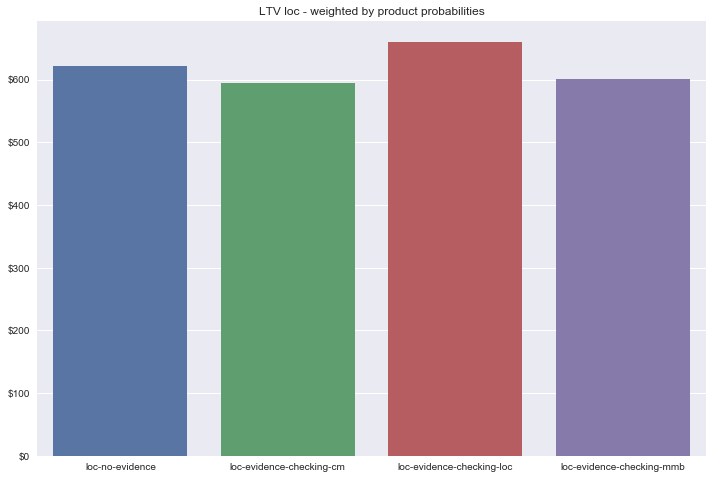

In [195]:

ltv_loc_no_evidence_expect, ltv_loc_evidence_checking_cm_expect,ltv_loc_evidence_checking_mmb_expect, ltv_loc_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_loc_no_evidence,avg_weekly_rev_loc_no_evidence,
   avg_cust_percent_loc_evidence_checking_cm, avg_weekly_rev_loc_evidence_checking_cm,
   avg_cust_percent_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_mmb,
   avg_cust_percent_loc_evidence_checking_loc, avg_weekly_rev_loc_evidence_checking_loc)

plt.figure(figsize=(12,8))
plt.title('LTV loc - weighted by product probabilities')
fig = sns.barplot(x=['loc-no-evidence','loc-evidence-checking-cm','loc-evidence-checking-loc',
               'loc-evidence-checking-mmb'],
           y=[ltv_loc_no_evidence_expect,ltv_loc_evidence_checking_cm_expect, ltv_loc_evidence_checking_loc_expect,
              ltv_loc_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

## Next, CMMA

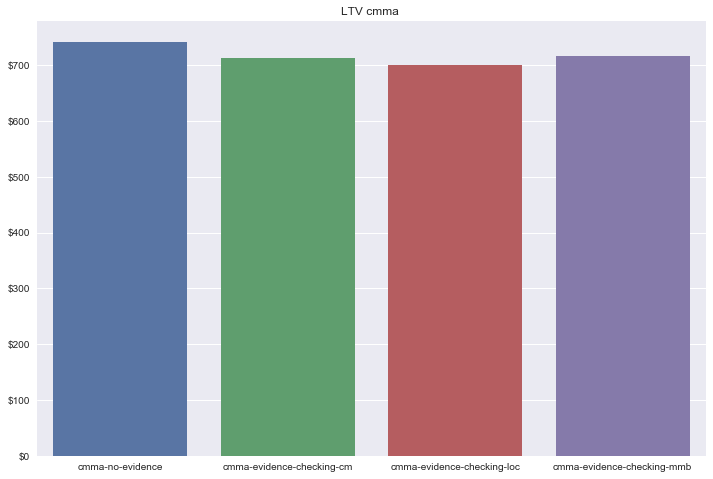

In [196]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_cmma_no_evidence, avg_cust_percent_cmma_evidence_checking_cm,\
avg_cust_percent_cmma_evidence_checking_mmb, avg_cust_percent_cmma_evidence_checking_loc = \
get_average_per_time_period(cumulative_cmma_customers_percent_no_evidence_final,
                            cumulative_cmma_customers_percent_evidence_checking_cm_final,
                           cumulative_cmma_customers_percent_evidence_checking_mmb_final,
                           cumulative_cmma_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_cmma_no_evidence, avg_weekly_rev_cmma_evidence_checking_cm,\
avg_weekly_rev_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_loc = \
get_average_per_time_period(cumulative_cmma_rev_per_customer_no_evidence_final,
                            cumulative_cmma_rev_per_customer_evidence_checking_cm_final,
                           cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_cmma_rev_per_customer_evidence_checking_loc_final)




ltv_cmma_no_evidence, ltv_cmma_evidence_checking_cm,ltv_cmma_evidence_checking_mmb, ltv_cmma_evidence_checking_loc  = \
ltv(avg_cust_percent_cmma_no_evidence,avg_weekly_rev_cmma_no_evidence,
   avg_cust_percent_cmma_evidence_checking_cm, avg_weekly_rev_cmma_evidence_checking_cm,
   avg_cust_percent_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_mmb,
   avg_cust_percent_cmma_evidence_checking_loc, avg_weekly_rev_cmma_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV cmma ')
fig = sns.barplot(x=['cmma-no-evidence','cmma-evidence-checking-cm','cmma-evidence-checking-loc','cmma-evidence-checking-mmb'],
           y=[ltv_cmma_no_evidence,ltv_cmma_evidence_checking_cm, ltv_cmma_evidence_checking_loc,
              ltv_cmma_evidence_checking_mmb])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick) 

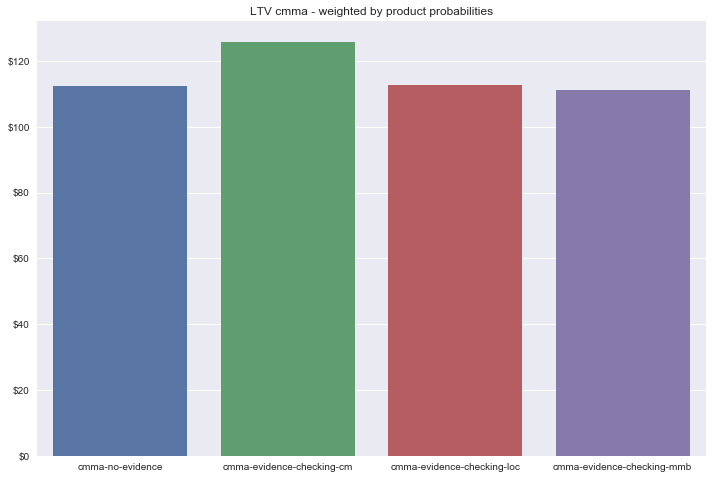

In [197]:
ltv_cmma_no_evidence_expect, ltv_cmma_evidence_checking_cm_expect,ltv_cmma_evidence_checking_mmb_expect, ltv_cmma_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_cmma_no_evidence,avg_weekly_rev_cmma_no_evidence,
   avg_cust_percent_cmma_evidence_checking_cm, avg_weekly_rev_cmma_evidence_checking_cm,
   avg_cust_percent_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_mmb,
   avg_cust_percent_cmma_evidence_checking_loc, avg_weekly_rev_cmma_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV cmma - weighted by product probabilities')
fig = sns.barplot(x=['cmma-no-evidence','cmma-evidence-checking-cm','cmma-evidence-checking-loc','cmma-evidence-checking-mmb'],
           y=[ltv_cmma_no_evidence_expect,ltv_cmma_evidence_checking_cm_expect, ltv_cmma_evidence_checking_loc_expect,
              ltv_cmma_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

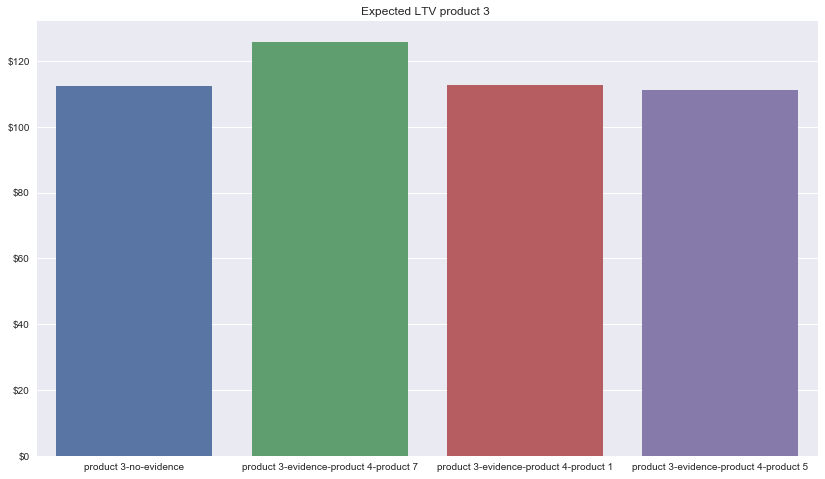

In [198]:
ltv_cmma_no_evidence_expect, ltv_cmma_evidence_checking_cm_expect,ltv_cmma_evidence_checking_mmb_expect, ltv_cmma_evidence_checking_loc_expect  = \
expected_ltv(avg_cust_percent_cmma_no_evidence,avg_weekly_rev_cmma_no_evidence,
   avg_cust_percent_cmma_evidence_checking_cm, avg_weekly_rev_cmma_evidence_checking_cm,
   avg_cust_percent_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_mmb,
   avg_cust_percent_cmma_evidence_checking_loc, avg_weekly_rev_cmma_evidence_checking_loc)


plt.figure(figsize=(14,8))
plt.title('Expected LTV product 3 ')
fig = sns.barplot(x=['product 3-no-evidence','product 3-evidence-product 4-product 7',
               'product 3-evidence-product 4-product 1','product 3-evidence-product 4-product 5'],
           y=[ltv_cmma_no_evidence_expect,ltv_cmma_evidence_checking_cm_expect, ltv_cmma_evidence_checking_loc_expect,
              ltv_cmma_evidence_checking_mmb_expect])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

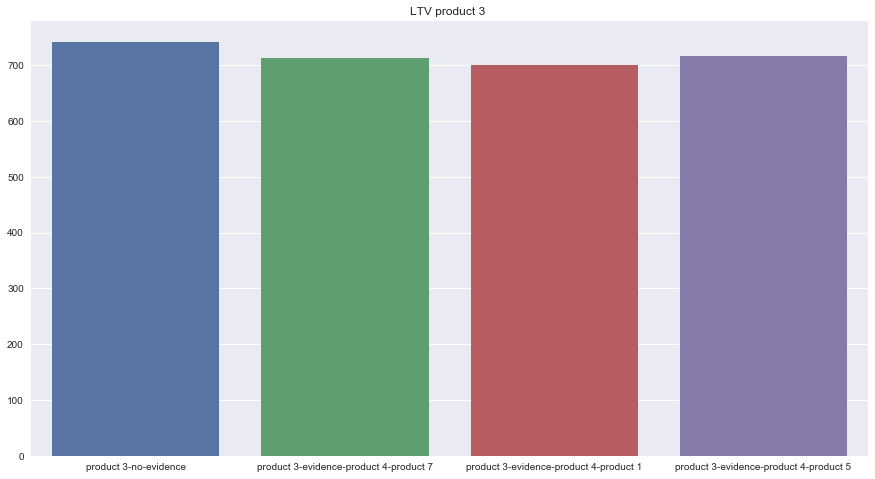

In [199]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_cmma_no_evidence, avg_cust_percent_cmma_evidence_checking_cm,\
avg_cust_percent_cmma_evidence_checking_mmb, avg_cust_percent_cmma_evidence_checking_loc = \
get_average_per_time_period(cumulative_cmma_customers_percent_no_evidence_final,
                            cumulative_cmma_customers_percent_evidence_checking_cm_final,
                           cumulative_cmma_customers_percent_evidence_checking_mmb_final,
                           cumulative_cmma_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_cmma_no_evidence, avg_weekly_rev_cmma_evidence_checking_cm,\
avg_weekly_rev_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_loc = \
get_average_per_time_period(cumulative_cmma_rev_per_customer_no_evidence_final,
                            cumulative_cmma_rev_per_customer_evidence_checking_cm_final,
                           cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_cmma_rev_per_customer_evidence_checking_loc_final)




ltv_cmma_no_evidence, ltv_cmma_evidence_checking_cm,ltv_cmma_evidence_checking_mmb, ltv_cmma_evidence_checking_loc  = \
ltv(avg_cust_percent_cmma_no_evidence,avg_weekly_rev_cmma_no_evidence,
   avg_cust_percent_cmma_evidence_checking_cm, avg_weekly_rev_cmma_evidence_checking_cm,
   avg_cust_percent_cmma_evidence_checking_mmb, avg_weekly_rev_cmma_evidence_checking_mmb,
   avg_cust_percent_cmma_evidence_checking_loc, avg_weekly_rev_cmma_evidence_checking_loc)


plt.figure(figsize=(15,8))
plt.title('LTV product 3 ')
sns.barplot(x=['product 3-no-evidence','product 3-evidence-product 4-product 7',
               'product 3-evidence-product 4-product 1','product 3-evidence-product 4-product 5'],
           y=[ltv_cmma_no_evidence,ltv_cmma_evidence_checking_cm, ltv_cmma_evidence_checking_loc,
              ltv_cmma_evidence_checking_mmb])

## FInal Table of all LTV's

In [201]:
ltv_table_dict = {
    'ltv_cmma_AvgRev':[ltv_cmma_no_evidence,ltv_cmma_evidence_checking_cm, ltv_cmma_evidence_checking_loc,
              ltv_cmma_evidence_checking_mmb],
    'ltv_mmb_AvgRev':[ltv_mmb_no_evidence,ltv_mmb_evidence_checking_cm, ltv_mmb_evidence_checking_loc,
              ltv_mmb_evidence_checking_mmb],
    'ltv_loc_AvgRev':[np.mean(ltv_loc_no_evidence),np.mean(ltv_loc_evidence_checking_cm),np.mean(ltv_loc_evidence_checking_loc),
              np.mean(ltv_loc_evidence_checking_mmb)],
    'ltv_checking_AvgRev':[ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb],
    'ltv_fx_AvgRev':[ltv_fx_no_evidence,ltv_fx_evidence_checking_cm, ltv_fx_evidence_checking_loc,
              ltv_fx_evidence_checking_mmb],
    'ltv_cm_AvgRev':[ltv_cm_no_evidence,ltv_cm_evidence_checking_cm, ltv_cm_evidence_checking_loc,
              ltv_cm_evidence_checking_mmb],
    'ltv_es_AvgRev':[ltv_es_no_evidence,ltv_es_evidence_checking_cm, ltv_es_evidence_checking_loc,
              ltv_es_evidence_checking_mmb]
    
    
    
    
    
}

In [202]:
ltv_table_expect_percent_df = pd.DataFrame.from_dict(ltv_table_dict)

In [203]:
ltv_table_expect_percent_df.describe()

ltv_checking_AvgRev  ltv_cm_AvgRev  ltv_cmma_AvgRev  ltv_es_AvgRev  \
count             4.000000       4.000000         4.000000       4.000000   
mean           5427.663149    5290.459861       718.350096    3577.593765   
std              19.983953     236.130382        17.342671     422.962320   
min            5406.051858    4967.077307       700.828620    3197.198954   
25%            5415.668004    5203.614322       710.445962    3322.150194   
50%            5425.973952    5338.230538       715.168705    3473.575902   
75%            5437.969098    5425.076078       723.072838    3729.019474   
max            5452.652834    5518.301062       742.234354    4166.024302   

       ltv_fx_AvgRev  ltv_loc_AvgRev  ltv_mmb_AvgRev  
count       4.000000        4.000000        4.000000  
mean     5714.524380     4801.128953    12533.410327  
std      1928.783157      298.267884      202.210189  
min      4519.675495     4426.193846    12234.136381  
25%      4708.057764     4633.801026    12515.881339  
50%      4872.070245     4845.854181    12609.905323  
75%      5878.536861     5013.182108    12627.434311  
max      8594.281536     5086.613602    12679.694280

In [204]:
ltv_table_expect_percent_df.describe().iloc[1,:]

ltv_checking_AvgRev     5427.663149
ltv_cm_AvgRev           5290.459861
ltv_cmma_AvgRev          718.350096
ltv_es_AvgRev           3577.593765
ltv_fx_AvgRev           5714.524380
ltv_loc_AvgRev          4801.128953
ltv_mmb_AvgRev         12533.410327
Name: mean, dtype: float64

In [206]:
ltv_table_dict_prodprob = {
    'ltv_cmma_ProdProb':[ltv_cmma_no_evidence_expect,ltv_cmma_evidence_checking_cm_expect, ltv_cmma_evidence_checking_loc_expect,
              ltv_cmma_evidence_checking_mmb_expect],
    'ltv_mmb_ProdProb':[ltv_mmb_no_evidence_expect,ltv_mmb_evidence_checking_cm_expect, ltv_mmb_evidence_checking_loc_expect,
              ltv_mmb_evidence_checking_mmb_expect],
    'ltv_loc_ProdProb':[np.mean(ltv_loc_no_evidence_expect),np.mean(ltv_loc_evidence_checking_cm_expect),np.mean(ltv_loc_evidence_checking_loc_expect),
              np.mean(ltv_loc_evidence_checking_mmb_expect)],
    'ltv_checking_ProdProb':[ltv_checking_no_evidence_expect,ltv_checking_evidence_checking_cm_expect, ltv_checking_evidence_checking_loc_expect,
              ltv_checking_evidence_checking_mmb_expect],
    'ltv_fx_ProdProb':[ltv_fx_no_evidence_expect,ltv_fx_evidence_checking_cm_expect, ltv_fx_evidence_checking_loc_expect,
              ltv_fx_evidence_checking_mmb_expect],
    'ltv_cm_ProdProb':[ltv_cm_no_evidence_expect,ltv_cm_evidence_checking_cm_expect, ltv_cm_evidence_checking_loc_expect,
              ltv_cm_evidence_checking_mmb_expect],
    'ltv_es_ProdProb':[ltv_es_no_evidence_expect,ltv_es_evidence_checking_cm_expect, ltv_es_evidence_checking_loc_expect,
              ltv_es_evidence_checking_mmb_expect]
    
    

    
    
}

In [207]:
prob_prob_weight_ltv = pd.DataFrame.from_dict(ltv_table_dict_prodprob)

In [208]:
prob_prob_weight_ltv .describe()

ltv_checking_ProdProb  ltv_cm_ProdProb  ltv_cmma_ProdProb  \
count               4.000000         4.000000           4.000000   
mean             5436.128553       743.635928         115.581607   
std                33.512957        11.603760           6.903393   
min              5397.292966       727.906573         111.320849   
25%              5417.638734       740.091443         112.049940   
50%              5435.437564       745.445998         112.555376   
75%              5453.927384       748.990484         116.087043   
max              5476.346119       755.745144         125.894830   

       ltv_es_ProdProb  ltv_fx_ProdProb  ltv_loc_ProdProb  ltv_mmb_ProdProb  
count         4.000000         4.000000          4.000000          4.000000  
mean        355.630093       475.589354        619.298456       2648.021304  
std           9.383275        79.126045         30.079896        154.465431  
min         342.891128       420.912030        594.059989       2515.427788  
25%         352.480501       437.089631        598.636705       2568.220657  
50%         357.194474       444.164709        611.293339       2603.213392  
75%         360.344066       482.664432        631.955090       2683.014038  
max         365.240297       593.115966        660.547158       2870.230642